# Домашнее задание № 2 Построение заявочной скоринговой модели
- ✍ работы должны быть высланы на почту maria.vorobyova.ser@gmail.com с темой HSE_CS_[направление]_ФИО, например HSE_CS_ПАД_ИВАНОВ_ИВАН_ИВАНОВИЧ

Описание датасета:

1. target - целевая переменная (1- клиент достиг просрочку 90 дней в первый год кредита, 0 - иначе)
2. INCOME_TYPE - тип подтверждения дохода                
3. EDUCATION_  -  образование               
4. CUSTOMER_CATEGORY_  - категория клиента         
5. income   - доход клиента                  
6. DEPENDANT_NUMBER   - количество иждевенцев         
7. IS_EMPL    - это сотрудник банка                  
8. COUNT_ACTIVE_CREDIT_NO_CC  - количество октрытых кредитов без учета кредитных карт
9. CNT_MNTH_FROM_LAST_PMNT    - сколько месяцев прошло с момента последнего платежа по предудущему кредиту
10. age  - возраст клиента                     
11. experience  - стаж клиента               
12. inquiry_14_day   - количество запросов в бюро кредитных историй за последние 14 дней          
13. inquiry_21_day   - количество запросов в бюро кредитных историй за последние 21 день                  
14. count_mnth_act_passport - сколько месяцев прошло с момента выдачи выдачи паспорта     
15. UID  - ID заявки    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [90]:
accept = pd.read_csv('accept.csv')
# reject =pd.read_csv('reject.csv')
accept.columns = [col.lower() for col in accept.columns]
# reject.columns = [col.lower() for col in reject.columns]
accept

,target,income_type,education_,customer_category_,income,dependant_number,is_empl,count_active_credit_no_cc,cnt_mnth_from_last_pmnt,age,experience,inquiry_14_day,inquiry_21_day,count_mnth_act_passport,uid
0,0,2NDFL,elementary,NaN,56245.0,0.0,0,NaN,NaN,50.567123,2.131507,NaN,NaN,5.536986,10
1,0,OTHER,elementary,Corporate,119510.0,0.0,1,1.0,1.115569,28.191781,2.032877,1.0,1.0,8.109589,11
2,0,2NDFL,advanced,NaN,12020.0,0.0,0,1.0,0.303786,36.437742,17.731507,0.0,0.0,9.123535,13
3,0,OTHER,advanced,Corporate,21611.0,0.0,1,NaN,NaN,33.333446,1.711528,NaN,NaN,7.972678,15
4,0,OTHER,elementary,VIP,146841.0,0.0,1,0.0,30.530914,36.531073,0.577648,0.0,0.0,7.737705,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32549,1,OTHER,elementary,NaN,90000.0,0.0,0,0.0,10.693705,40.642922,4.847840,0.0,0.0,11.528767,138843
32550,1,OTHER,advanced,NaN,60000.0,0.0,0,1.0,0.891062,28.163934,3.329927,1.0,1.0,7.242256,139153
32551,1,OTHER,advanced,NaN,45000.0,0.0,0,0.0,0.301770,30.703810,1.418879,1.0,1.0,9.325728,139154
32552,1,OTHER,advanced,Corporate,40000.0,0.0,0,NaN,NaN,29.716581,5.363156,NaN,NaN,6.935759,140165


# Explatory Data Analysis. Максимально - 2 балла

- 0 баллов, если задание не выполнено
- 1 балл, если посчитаны статистики,есть какие-то графики (важно, ПОЛЕЗНЫЕ графики), но не сделаны выводы
- 2 балла, если посчитаны статистики и есть графики (важно, ПОЛЕЗНЫЕ графики) и сделаны ВЫВОДЫ (важно, что выводы правильные)

In [3]:
print(f'Размер датафрейма accept: {accept.shape}')
# список колонок с типами
accept.dtypes

Размер датафрейма accept: (32554, 15)


target                         int64
income_type                   object
education_                    object
customer_category_            object
income                       float64
dependant_number             float64
is_empl                        int64
count_active_credit_no_cc    float64
cnt_mnth_from_last_pmnt      float64
age                          float64
experience                   float64
inquiry_14_day               float64
inquiry_21_day               float64
count_mnth_act_passport      float64
uid                            int64
dtype: object

Посмотрим, что по уникальным, нулевым и пропущенным значениям!

In [4]:
search = (
    accept.isna().sum(axis=0).to_frame().rename(columns={0: 'Null'})
    .join((accept.isna().sum(axis=0) / len(accept) * 100).to_frame(), rsuffix='_right').rename(columns={0: '%Null'})
    .join(accept.nunique(axis=0).to_frame().rename(columns={0: 'Unique'}))
    .join((accept.nunique(axis=0) / len(accept) * 100).to_frame().rename(columns={0: '%Unique'}))
    .join(accept[accept.eq(0)].count().to_frame().rename(columns={0: 'Zero'})).rename(columns={'0': '%Zero'})
    .join((accept[accept.eq(0)].count()/len(accept)*100).to_frame().rename(columns = {0:'%Zero'}))
)
search 

,Null,%Null,Unique,%Unique,Zero,%Zero
target,0,0.000000,2,0.006144,31857,97.858942
income_type,0,0.000000,2,0.006144,0,0.000000
education_,0,0.000000,4,0.012287,0,0.000000
customer_category_,19459,59.774528,2,0.006144,0,0.000000
income,653,2.005898,18350,56.367881,4,0.012287
dependant_number,40,0.122873,5,0.015359,32355,99.388708
is_empl,0,0.000000,2,0.006144,19853,60.984825
count_active_credit_no_cc,8364,25.692695,9,0.027646,12273,37.700436
cnt_mnth_from_last_pmnt,10145,31.163605,17259,53.016526,13,0.039934
age,0,0.000000,24297,74.635989,0,0.000000


Заметно выделяется customer_category_ с 60% нулевых значений (обработаем далее при делении на бины). Также значительное число неизвестных значений у переменных  customer_category_, count_active_credit_no_cc, cnt_mnth_from_last_pmnt,  inquiry_14_day, inquiry_21_day (заметим, что количество нанов у последних двух переменных одинаковое, явно это одни и те же заявки). UID логично уникален, в дальнейшем удалим.

In [5]:
accept.describe(include = 'all')
#основные статистические показатели всех переменных

,target,income_type,education_,customer_category_,income,dependant_number,is_empl,count_active_credit_no_cc,cnt_mnth_from_last_pmnt,age,experience,inquiry_14_day,inquiry_21_day,count_mnth_act_passport,uid
count,32554.000000,32554,32554,13095,3.190100e+04,32514.000000,32554.000000,24190.000000,22409.000000,32554.000000,32507.000000,23333.000000,23333.000000,32554.000000,32554.000000
unique,NaN,2,4,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,OTHER,elementary,Corporate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21863,21330,12710,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.021411,NaN,NaN,NaN,6.133177e+04,0.006182,0.390152,0.661926,20.856970,36.432497,4.889609,0.362277,0.426006,7.250201,70630.132795
std,0.144751,NaN,NaN,NaN,1.069330e+05,0.096019,0.487792,0.835298,143.422108,8.219484,5.344778,0.611643,0.685549,3.341657,40512.136053
min,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000,0.000000,0.000000,-66.559028,25.000187,-157.184939,0.000000,0.000000,-0.019126,10.000000
25%,0.000000,NaN,NaN,NaN,2.677800e+04,0.000000,0.000000,0.000000,0.530578,29.507145,1.241436,0.000000,0.000000,4.996845,35821.750000
50%,0.000000,NaN,NaN,NaN,4.146300e+04,0.000000,0.000000,0.000000,0.928136,34.734015,3.279452,0.000000,0.000000,7.780822,70762.000000
75%,0.000000,NaN,NaN,NaN,7.000000e+04,0.000000,1.000000,1.000000,3.667899,42.200724,6.479452,1.000000,1.000000,9.912598,105834.250000


Некоторые перменные имеют выбросы (отрицательные значений): count_mnth_act_passport, experience, cnt_mnth_from_last_pmnt.
Надо заменить.

In [91]:
# заменим отрицательные значения на пропуск (эти переменные могут быть только неотрицательными)
for col in ['count_mnth_act_passport', 'experience', 'cnt_mnth_from_last_pmnt']:
    accept[col]=accept[col].map(lambda x: x if x>0 and x<60 else np.NaN) #так же обработаем выбросы, ибо они могут сильно испортить результат

In [7]:
accept.target.value_counts() #распределение таргета. в специфике задачи - то, что таргет сильно несбалансирован

target
0    31857
1      697
Name: count, dtype: int64

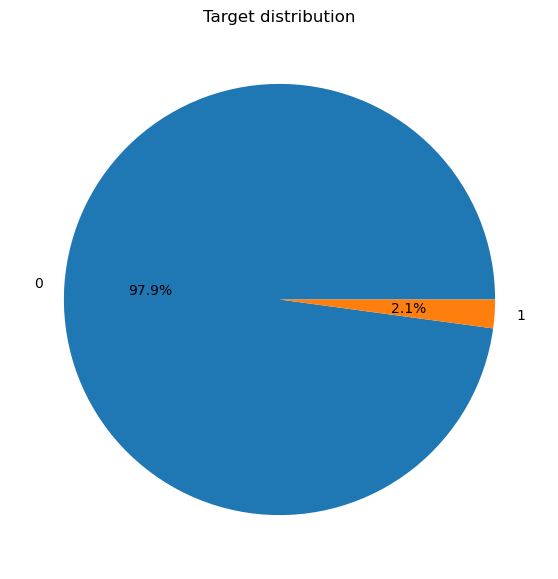

In [8]:
plt.figure(figsize = (7,7))
plt.pie(accept['target'].value_counts(), 
        labels = accept['target'].value_counts().index, 
        autopct='%1.1f%%')
plt.title('Target distribution');

Что с возрастом?

In [9]:
accept.groupby('target')['age'].mean()
#разница минимальна

target
0    36.42993
1    36.54982
Name: age, dtype: float64

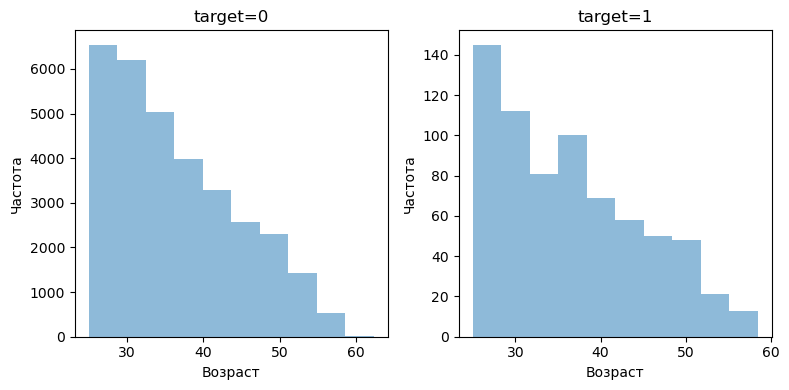

In [10]:
grouped_accept = accept.groupby('target')
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
for (group, subset), ax in zip(grouped_accept, axes):
    ax.hist(subset['age'], bins=10, alpha=0.5)
    ax.set_title(f'target={group}')
    ax.set_xlabel('Возраст')
    ax.set_ylabel('Частота')

plt.tight_layout()
plt.show()


Замечу, что несмотря на то, что средний возраст по обоим значениям таргета идентичный, однако слева мы видим ниспадающую лесенку, справа лесенка не идет так же красиво на убыль - меньше людей, которые дефолтнулись в первый год в 30-35 лет, чем слева, однако больше людей, не вернувших кредит, в возрасте 35-40 лет - но все равно возраст в общем и целом не влияет (смотрим на внешний вид распределения, потому что частота на обеих графиках разная)

In [11]:
accept.count_active_credit_no_cc.value_counts()
#у половины клиентов не было открытых кредитов на момент формирования заявки
# а так у людей, у которых все-таки есть уже кредиты, их преимущественно 1-2
#значения этой переменной больше 3 лично меня сильно смущают, надо особенно наблюдать за такими клиентами


count_active_credit_no_cc
0.0    12273
1.0     8942
2.0     2194
3.0      555
4.0      157
5.0       43
7.0       12
6.0       11
8.0        3
Name: count, dtype: int64

In [12]:
pd.crosstab(accept.count_active_credit_no_cc, accept.target, normalize='index')
#наблюдается закономерность, чем больше кредитов, тем выше дефолтность

target,0,1
count_active_credit_no_cc,,
0.0,0.985171,0.014829
1.0,0.980765,0.019235
2.0,0.969006,0.030994
3.0,0.960360,0.039640
4.0,0.955414,0.044586
5.0,0.906977,0.093023
6.0,0.909091,0.090909
7.0,0.916667,0.083333
8.0,0.666667,0.333333


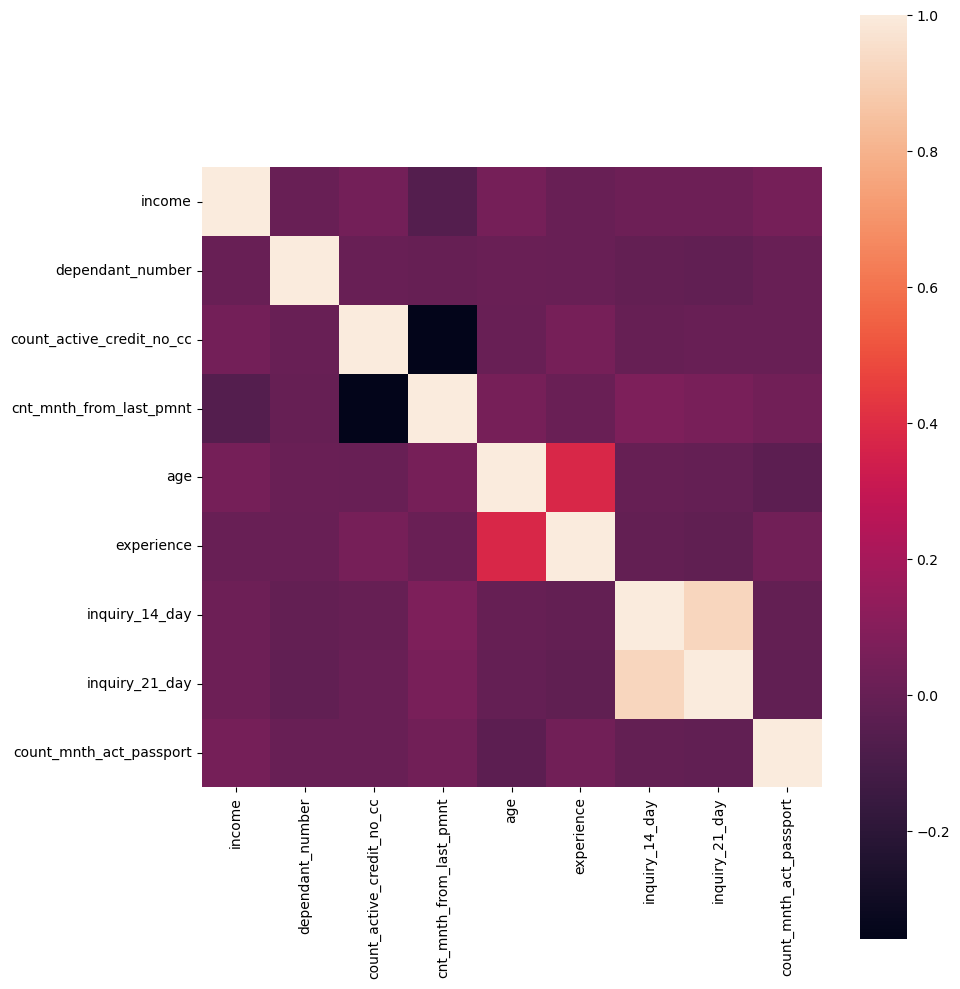

In [13]:
# матрица корреляций
correlations = accept.select_dtypes(include=['float64']).corr()
plt.figure(figsize=(10, 12))
sns.heatmap(correlations, square=True)
plt.show() #критического уровня корреляции ни у кого нет, кроме inquire_14_day и inquire_21_day
# но мы над inquire_14_day и inquire_21_day поработаем дальше
#также у age и experience наблюдается зависимость, так как опыт работы сильно зависит от возраста человека

In [14]:
accept.groupby('income_type', as_index=False).agg({'target':'mean'})
#уровень дефолта в типе подтверждения дохода OTHER выше, чем в 2NDFL

,income_type,target
0,2NDFL,0.018053
1,OTHER,0.023053


Что с образованием?

In [15]:
accept.education_.value_counts()

education_
elementary    21330
advanced       8523
beginner       1471
high           1230
Name: count, dtype: int64

In [16]:
pd.crosstab(accept.education_, accept.target, normalize='index')
# Наблюдается более высокий уровень дефолта среди клиентов с высшим образованием
# Это может быть связано с их более высокими доходами, что влечет за собой выдачу более крупных кредитов

target,0,1
education_,,
advanced,0.974539,0.025461
beginner,0.980965,0.019035
elementary,0.980309,0.019691
high,0.973984,0.026016


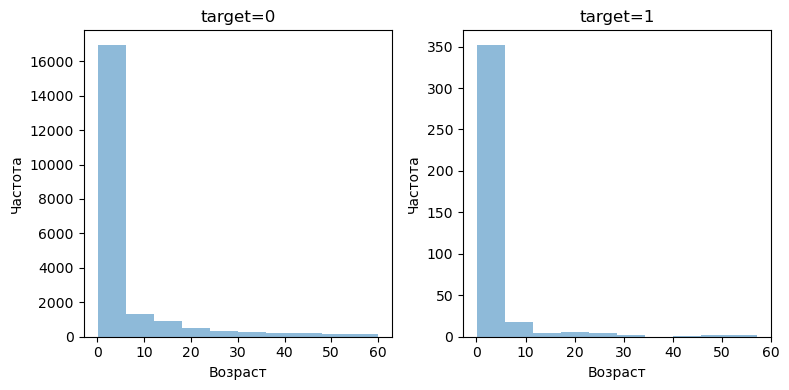

In [17]:
pd.crosstab(accept.cnt_mnth_from_last_pmnt, accept.target, normalize='index')
#образование также разделят клиентов по уровню дефолтности
grouped_accept = accept.groupby('target')
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
for (group, subset), ax in zip(grouped_accept, axes):
    ax.hist(subset['cnt_mnth_from_last_pmnt'], bins=10, alpha=0.5)
    ax.set_title(f'target={group}')
    ax.set_xlabel('Возраст')
    ax.set_ylabel('Частота')

plt.tight_layout()
plt.show() #на этом графике ничего не видно :)

Итог:
Датасет содержит 32554 строки и 15 колонок, из них 5 типа категория, целевая переменная (target) бинарная, остальные интервальные (9 из которых имеют пропуски).  Теперь надо поработать над созданием новых переменных и устранением корреляции.

# Создание дополнительных переменных. Максимально - 1 балл

Будьте креативными, чем больше переменных, тем больше балл! При этом переменные должны быть логичными, нелогичные переменные не принимаются

- 0 баллов, если задание не выполнено
- 0.5 баллов - создана 2 дополнительные переменные
- 1 балл создано больше 3 переменных


1. ratio_experience: Это отношение опыта работы к возрасту заемщика. Эта переменная может быть важным фактором для оценки платежеспособности заемщика. Люди с более высоким отношением опыта работы к возрасту могут быть более надежными заемщиками.

2. income_per_dependant: Данная переменная представляет собой отношение дохода заемщика к количеству иждивенцев. Это может помочь оценить финансовое положение заемщика и его способность обеспечивать свою семью.

3. credit_density: Это отношение количества активных кредитов без кредитных карт к опыту работы. Данная переменная може помочь в оценке того, насколько интенсивно заемщик использует кредиты относительно своего опыта работы.

4. credit_exists: Данная переменная принимает значение 1, если у заемщика имеется хотя бы один активный кредит без кредитной карты, и 0 в противном случае. Это может быть важным флагом для выявления заемщиков, у которых уже есть кредитные обязате в целом.ьства.


In [92]:
accept['ratio_experience'] = accept['experience']/accept['age']
accept['income_per_dependant'] = accept['income'] / (accept['dependant_number'] + 1)
accept['credit_density'] = accept['count_active_credit_no_cc'] / accept['experience']
accept['credit_exists'] = np.where(accept['count_active_credit_no_cc'] > 0, 1, 0)

(accept.shape) #теперь 19 колонок

(32554, 19)

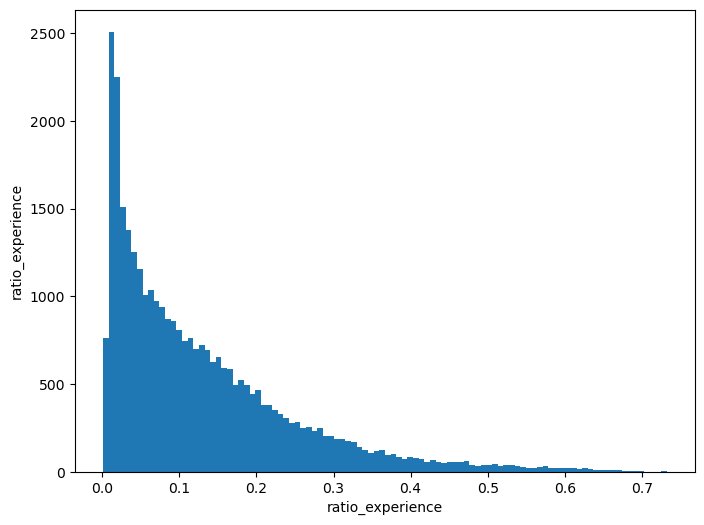

In [19]:
plt.figure(figsize=(8,6))
#посмотрим на распределение новой переменной (остальные не очень полезные)
plt.hist(accept['ratio_experience'].values, bins=100)
plt.xlabel('ratio_experience')
plt.ylabel('ratio_experience')
plt.show()

# Построение модели на одобренных заявках. Максимально - 4 балла

In [93]:
categorical_features = accept.select_dtypes(include=['object']).columns.tolist()
categorical_features = categorical_features+['is_empl'] +['credit_exists'] +['dependant_number']
categorical_features

['income_type',
 'education_',
 'customer_category_',
 'is_empl',
 'credit_exists',
 'dependant_number']

In [94]:
interval_features = accept.select_dtypes(include=['float64', 'int64']).columns.tolist()
interval_features.remove('target')
interval_features.remove('uid')
interval_features.remove('is_empl')
interval_features.remove('dependant_number')
interval_features

['income',
 'count_active_credit_no_cc',
 'cnt_mnth_from_last_pmnt',
 'age',
 'experience',
 'inquiry_14_day',
 'inquiry_21_day',
 'count_mnth_act_passport',
 'ratio_experience',
 'income_per_dependant',
 'credit_density']

In [95]:
import copy 
accept_df1 = copy.deepcopy(accept)
#сразу скопирую - пригодится при коарс классинге

# train, test, y_train, y_test = train_test_split(accept,
#                                                 accept['target'],
#                                                 test_size=0.2,
#                                                 random_state=42,
#                                                 stratify=accept['target'])

# train_for_reject = copy.deepcopy(train)
# y_train_for_reject  = copy.deepcopy(y_train)
# test_for_reject = copy.deepcopy(test)
# y_test_for_reject  = copy.deepcopy(y_test)
accept_df_for_reject = copy.deepcopy(accept) #а это для части реджекта


In [96]:
def calculate_woe_iv(dataset, feature, target):
    values_counts = dataset[feature].value_counts(dropna=False)

    lst = []
    for val in values_counts.index:
        lst.append({
            'Value': val,
            'All': values_counts[val],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })

    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['Distr_Bad'] = np.where(dset['Distr_Bad'] == 0, 0.0001, dset['Distr_Bad'])
    dset['Distr_Good'] = np.where(dset['Distr_Good'] == 0, 0.0001, dset['Distr_Good'])

    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset.replace({'WoE': {np.inf: 0, -np.inf: 0}}, inplace=True)

    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()

    dset = dset.sort_values(by='WoE')

    return dset, iv

In [97]:
for feature in interval_features:
    accept[feature + '_bin'] = pd.qcut(accept[feature], 20, duplicates='drop')
    accept[feature + '_bin'] = accept[feature + '_bin'].cat.add_categories("(0, 0]").fillna("(0, 0]")

for feature in categorical_features:
    accept[feature] = accept[feature].fillna("UNK")

In [98]:
train, test, y_train, y_test = train_test_split(accept,
                                                accept['target'],
                                                test_size=0.2,
                                                random_state=42,
                                                stratify=accept['target'])

In [99]:
scorecard = pd.DataFrame()
for feature in interval_features:
    df, iv = calculate_woe_iv(train, feature + '_bin', 'target')
    df['feature'] = feature
    train = train.merge(df[['Value', 'WoE']], how='inner', left_on=feature + '_bin', right_on='Value' )
    train = train.rename(columns={'WoE':'WoE'+'_'+feature})

    train = train.drop(columns = [feature, feature + '_bin', 'Value'])

    test = test.merge(df[['Value', 'WoE']], how='inner', left_on=feature + '_bin', right_on='Value' )
    test = test.rename(columns={'WoE':'WoE'+'_'+feature})


    test = test.drop(columns = [feature, feature + '_bin', 'Value'])
    scorecard = pd.concat([scorecard, df[['feature', 'Value', 'WoE']]])

    print('feature', feature, '  IV= ',iv)

feature income   IV=  0.2233063869323513
feature count_active_credit_no_cc   IV=  0.11700631476186311
feature cnt_mnth_from_last_pmnt   IV=  0.1790336740724514
feature age   IV=  0.04036082004726361
feature experience   IV=  0.4802001294045849
feature inquiry_14_day   IV=  0.13591538228152636
feature inquiry_21_day   IV=  0.15037174030655218
feature count_mnth_act_passport   IV=  0.06379811613337433
feature ratio_experience   IV=  0.471198460742306
feature income_per_dependant   IV=  0.21775176745718267
feature credit_density   IV=  0.22735964414148185


In [100]:
for feature in categorical_features:
    df, iv = calculate_woe_iv(train, feature , 'target')
    df['feature'] = feature
    train = train.merge(df[['Value', 'WoE']], how='inner', left_on=feature, right_on='Value' )
    train = train.rename(columns={'WoE':'WoE'+'_'+feature})
    train = train.drop(columns = [feature, 'Value'])

    test = test.merge(df[['Value', 'WoE']], how='inner', left_on=feature, right_on='Value' )
    test = test.rename(columns={'WoE':'WoE'+'_'+feature})
    test = test.drop(columns = [feature, 'Value'])
    scorecard = pd.concat([scorecard, df[['feature', 'Value', 'WoE']]])


    print('feature', feature, '  IV= ',iv)

feature income_type   IV=  0.014159279223568546
feature education_   IV=  0.024940573762550818
feature customer_category_   IV=  0.5175251426459084
feature is_empl   IV=  0.7722695553208109
feature credit_exists   IV=  0.004219467846336537
feature dependant_number   IV=  0.36185701250317615


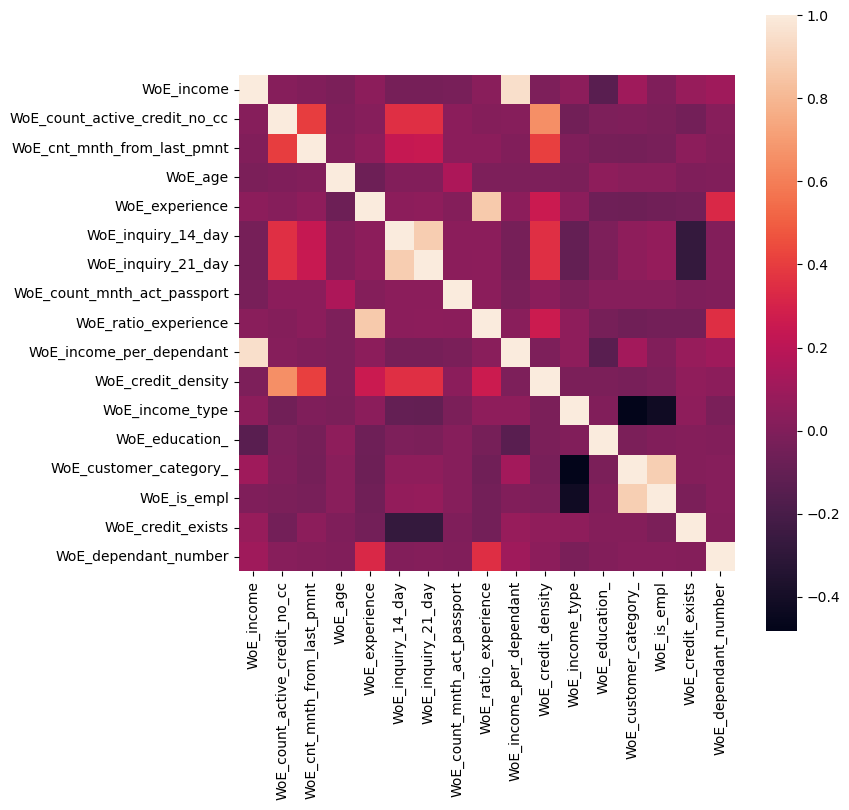

In [28]:
# матрица корреляций
correlations_woe = train.select_dtypes(include=['float64']).corr()
plt.figure(figsize=(8, 8))
sns.heatmap(correlations_woe, square=True)
plt.show()

In [101]:
features = test.columns.tolist()
features.remove('uid')
features.remove('target')
# исключаем, так как IV<0.02
features.remove('WoE_credit_exists')
features.remove('WoE_income_type')
# исключим inquiry_14_day, так inquiry_21_day коррелирует с inquiry_14_day,
# при этом IV у inquiry_21_day выше
features.remove('WoE_inquiry_14_day')

# исключаем WoE_CUSTOMER_CATEGORY_, так как коррелирует WoE_is_EMPL
features.remove('WoE_customer_category_')

# исключаем так как коррелирует experience с ratio_experience, у ratio iv меньше
features.remove('WoE_ratio_experience')
features

['WoE_income',
 'WoE_count_active_credit_no_cc',
 'WoE_cnt_mnth_from_last_pmnt',
 'WoE_age',
 'WoE_experience',
 'WoE_inquiry_21_day',
 'WoE_count_mnth_act_passport',
 'WoE_income_per_dependant',
 'WoE_credit_density',
 'WoE_education_',
 'WoE_is_empl',
 'WoE_dependant_number']

In [102]:
elements_to_remove = ['ratio_experience','inquiry_14_day']
interval_features = list(filter(lambda x: x not in elements_to_remove, interval_features))
to_change = scorecard[scorecard['feature'].isin(interval_features)]
to_change = to_change.sort_values(['feature', 'Value'], ascending=[True,True])
to_change= to_change[to_change.Value!='(0, 0]']
to_change['Value'] = to_change['Value'].apply(lambda x: pd.Interval(*map(float, str(x).strip('()[]').split(',')), closed='right'))
to_change['Value'] = pd.IntervalIndex(to_change['Value'])
to_change #предобработка перед coarse classing

,feature,Value,WoE
17,age,"(24.999, 25.931]",-0.271709
15,age,"(25.931, 26.833]",0.189004
3,age,"(26.833, 27.72]",-0.192451
12,age,"(27.72, 28.625]",0.148806
13,age,"(28.625, 29.507]",0.284693
...,...,...,...
8,income_per_dependant,"(118027.5, 159970.3]",0.099298
7,income_per_dependant,"(159970.3, 11450378.0]",0.148019
0,inquiry_21_day,"(-0.001, 1.0]",0.249283
2,inquiry_21_day,"(1.0, 2.0]",-0.681426


In [103]:
whole = [] #уменьшаю кол-во бинов
for interval_feature in interval_features:
    merged_values = []
    df = to_change.loc[to_change['feature'] == interval_feature]
    prev_value = None
    k = 1
    for j in range(1, len(df)):
        if prev_value is None: #обработка первого попавшего интервала фичи
            prev_value = pd.Interval(df.iloc[0, 1].left, df.iloc[0, 1].right)
        else:
            woe_prev = df.iloc[j - 1, 2]
            woe_cur = df.iloc[j, 2]
            
            if abs(woe_prev - woe_cur) <= 0.4: #woe должно отличаться не больше, чем на 0.4
                if k==j: #если прям с первого бина идут подряд похожие интервалы
                    prev_value = pd.Interval(df.iloc[0, 1].left, df.iloc[j, 1].right)              
                else:               
                    prev_value = pd.Interval(df.iloc[j - k, 1].left, df.iloc[j, 1].right)                  
                    k+=1                   
            else:
                k=1
                merged_values.append(prev_value)
                prev_value = pd.Interval(df.iloc[j, 1].left, df.iloc[j, 1].right)
    merged_values.append(prev_value)
    whole.append(merged_values)  
    
#это цикл для проверки наличия разрывов    
for i in range(len(whole)): 
    for j in range(1, len(whole[i])):
        if whole[i][j].left != whole[i][j-1].right:
            updated_interval = pd.Interval(whole[i][j-1].left, whole[i][j].left, closed='right')
            whole[i][j-1] = updated_interval  


In [104]:
normalized_values = []
for i, interval_list in enumerate(whole):
    print(interval_features[i])
    normalized_interval_list = [(interval.left, interval.right) for interval in interval_list]
    normalized_values.append(normalized_interval_list)
    print(normalized_interval_list)
#для каждой переменной разное количество бинов, количество уменьшилось у каждого
#экспериментировала со значением разницы woe (помимо 0.4) и изначальным количеством бинов в fine classing
#лучшие значения для моих данных после обучения модели получаются при таких условиях, которые я в итоге оставила

income
[(-0.001, 19134.0), (19134.0, 24674.0), (24674.0, 26778.0), (26778.0, 29806.0), (29806.0, 35000.0), (35000.0, 38535.0), (38535.0, 50000.0), (50000.0, 54991.0), (54991.0, 60030.0), (60030.0, 11450378.0)]
count_active_credit_no_cc
[(1.0, 8.0)]
cnt_mnth_from_last_pmnt
[(0.0433, 0.348), (0.348, 0.475), (0.475, 0.539), (0.539, 0.694), (0.694, 0.762), (0.762, 1.278), (1.278, 3.261), (3.261, 5.509), (5.509, 59.986)]
age
[(25.931, 36.014), (36.014, 62.321)]
experience
[(0.407, 4.405), (4.405, 5.031), (5.031, 6.479), (6.479, 7.517), (7.517, 9.102), (9.102, 15.502), (15.502, 40.805)]
inquiry_21_day
[(-0.001, 2.0), (2.0, 8.0)]
count_mnth_act_passport
[(0.963, 9.236), (9.236, 9.586), (9.586, 10.644), (10.644, 11.104), (11.104, 15.616)]
income_per_dependant
[(-0.001, 19000.0), (19000.0, 24549.6), (24549.6, 26661.5), (26661.5, 29694.8), (29694.8, 35000.0), (35000.0, 38389.0), (38389.0, 50000.0), (50000.0, 54810.0), (54810.0, 60000.0), (60000.0, 69999.25), (69999.25, 11450378.0)]
credit_densit

In [105]:
#к моему огромному сожалению, это не получилось автоматизировать, сколько бы я не пыталась.
accept_df = accept_df1.drop(['ratio_experience','inquiry_14_day'], axis=1) 
accept_df['income_bin'] = pd.cut(x=accept_df['income'], bins=[-0.001, 19134.0, 24674.0, 26778.0, 29806.0, 35000.0, 38535.0, 50000.0, 54991.0, 60030.0,11450378.0])
accept_df['income_bin'] = accept_df['income_bin'].cat.add_categories("[0,0]").fillna('[0,0]')

accept_df['cnt_mnth_from_last_pmnt_bin'] = pd.cut(x=accept_df['cnt_mnth_from_last_pmnt'], bins=[0.0433, 0.348, 0.475, 0.539, 0.694, 0.762,1.278, 3.261, 5.509, 59.986])
accept_df['cnt_mnth_from_last_pmnt_bin'] = accept_df['cnt_mnth_from_last_pmnt_bin'].cat.add_categories("[0,0]").fillna('[0,0]')

accept_df['age_bin'] = pd.cut(x=accept_df['age'], bins=[25.931, 36.014, 62.321])
accept_df['age_bin']=accept_df['age_bin'].cat.add_categories("[0,0]").fillna('[0,0]')

accept_df['experience_bin'] = pd.cut(x=accept_df['experience'], bins=[0.407, 4.405, 5.031, 6.479,7.517, 9.102, 15.502, 40.805])
accept_df['experience_bin']=accept_df['experience_bin'].cat.add_categories("[0,0]").fillna('[0,0]')

accept_df['inquiry_21_day_bin']= pd.cut(x=accept_df['inquiry_21_day'], bins=[-0.001, 2.0, 8.0])
accept_df['inquiry_21_day_bin']=accept_df['inquiry_21_day_bin'].cat.add_categories("[0,0]").fillna('[0,0]')

accept_df['count_mnth_act_passport_bin']= pd.cut(x=accept_df['count_mnth_act_passport'], bins=[0.963,9.236,9.586, 10.644, 11.104, 15.616])
accept_df['count_mnth_act_passport_bin']=accept_df['count_mnth_act_passport_bin'].cat.add_categories("[0,0]").fillna('[0,0]')

accept_df['income_per_dependant_bin']= pd.cut(x=accept_df['income_per_dependant'], bins=[-0.001, 19000.0, 24549.6, 26661.5,29694.8, 35000.0, 38389.0, 50000.0, 54810.0, 60000.0, 69999.25, 11450378.0])
accept_df['income_per_dependant_bin']=accept_df['income_per_dependant_bin'].cat.add_categories("[0,0]").fillna('[0,0]')

accept_df['credit_density_bin']= pd.cut(x=accept_df['credit_density'], bins=[0.0893,0.247, 0.998, 26.78])
accept_df['credit_density_bin']=accept_df['credit_density_bin'].cat.add_categories("[0,0]").fillna('[0,0]')

accept_df['count_active_credit_no_cc_bin']= pd.cut(x=accept_df['count_active_credit_no_cc'], bins=[1.0, 8.0])
accept_df['count_active_credit_no_cc_bin']=accept_df['count_active_credit_no_cc_bin'].cat.add_categories("[0,0]").fillna('[0,0]')

for feature in categorical_features:
    accept_df[feature] = accept_df[feature].fillna("UNK")

In [106]:
train, test, y_train, y_test = train_test_split(accept_df,
                                                accept_df['target'],
                                                test_size=0.2,
                                                random_state=42,
                                                stratify=accept['target'])

In [107]:
scorecard_coarse = pd.DataFrame()

for feature in interval_features:

    df, iv = calculate_woe_iv(train, feature + '_bin', 'target')
    df['feature'] = feature
    train = train.merge(df[['Value', 'WoE']], how='inner', left_on=feature + '_bin', right_on='Value' )
    train = train.rename(columns={'WoE':'WoE'+'_'+feature})

    train = train.drop(columns = [feature, feature + '_bin', 'Value'])

    test = test.merge(df[['Value', 'WoE']], how='inner', left_on=feature + '_bin', right_on='Value' )
    test = test.rename(columns={'WoE':'WoE'+'_'+feature})


    test = test.drop(columns = [feature, feature + '_bin', 'Value'])
    scorecard_coarse = pd.concat([scorecard_coarse, df[['feature', 'Value', 'WoE']]])
    print('feature', feature, '  IV= ',iv)

feature income   IV=  0.21374735504577705
feature count_active_credit_no_cc   IV=  0.04515159585311514
feature cnt_mnth_from_last_pmnt   IV=  0.14941982253493227
feature age   IV=  0.015404865338945828
feature experience   IV=  0.19087617992691003
feature inquiry_21_day   IV=  0.11075479848838654
feature count_mnth_act_passport   IV=  0.02924668977350757
feature income_per_dependant   IV=  0.20608715842562156
feature credit_density   IV=  0.08176493237283661


In [108]:
for feature in categorical_features:
    df, iv = calculate_woe_iv(train, feature , 'target')
    df['feature'] = feature
    train = train.merge(df[['Value', 'WoE']], how='inner', left_on=feature, right_on='Value' )
    train = train.rename(columns={'WoE':'WoE'+'_'+feature})
    train = train.drop(columns = [feature, 'Value'])

    test = test.merge(df[['Value', 'WoE']], how='inner', left_on=feature, right_on='Value' )
    test = test.rename(columns={'WoE':'WoE'+'_'+feature})
    test = test.drop(columns = [feature, 'Value'])
    scorecard_coarse = pd.concat([scorecard_coarse, df[['feature', 'Value', 'WoE']]])


    print('feature', feature, '  IV= ',iv)

feature income_type   IV=  0.014159279223568546
feature education_   IV=  0.024940573762550818
feature customer_category_   IV=  0.5175251426459084
feature is_empl   IV=  0.7722695553208109
feature credit_exists   IV=  0.004219467846336537
feature dependant_number   IV=  0.36185701250317615


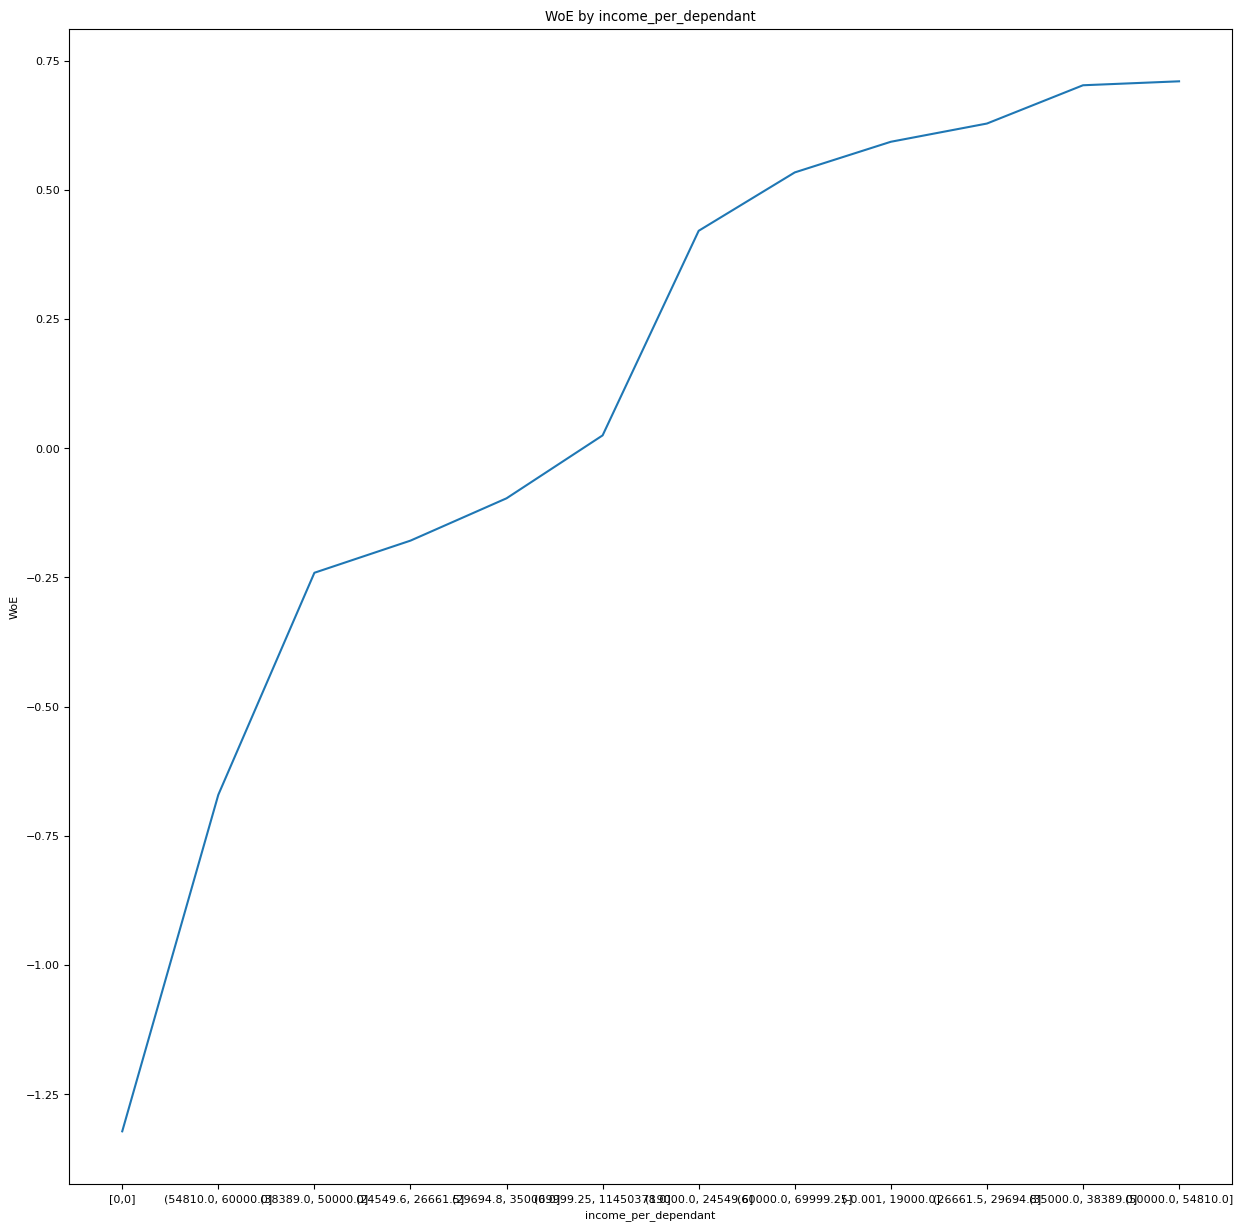

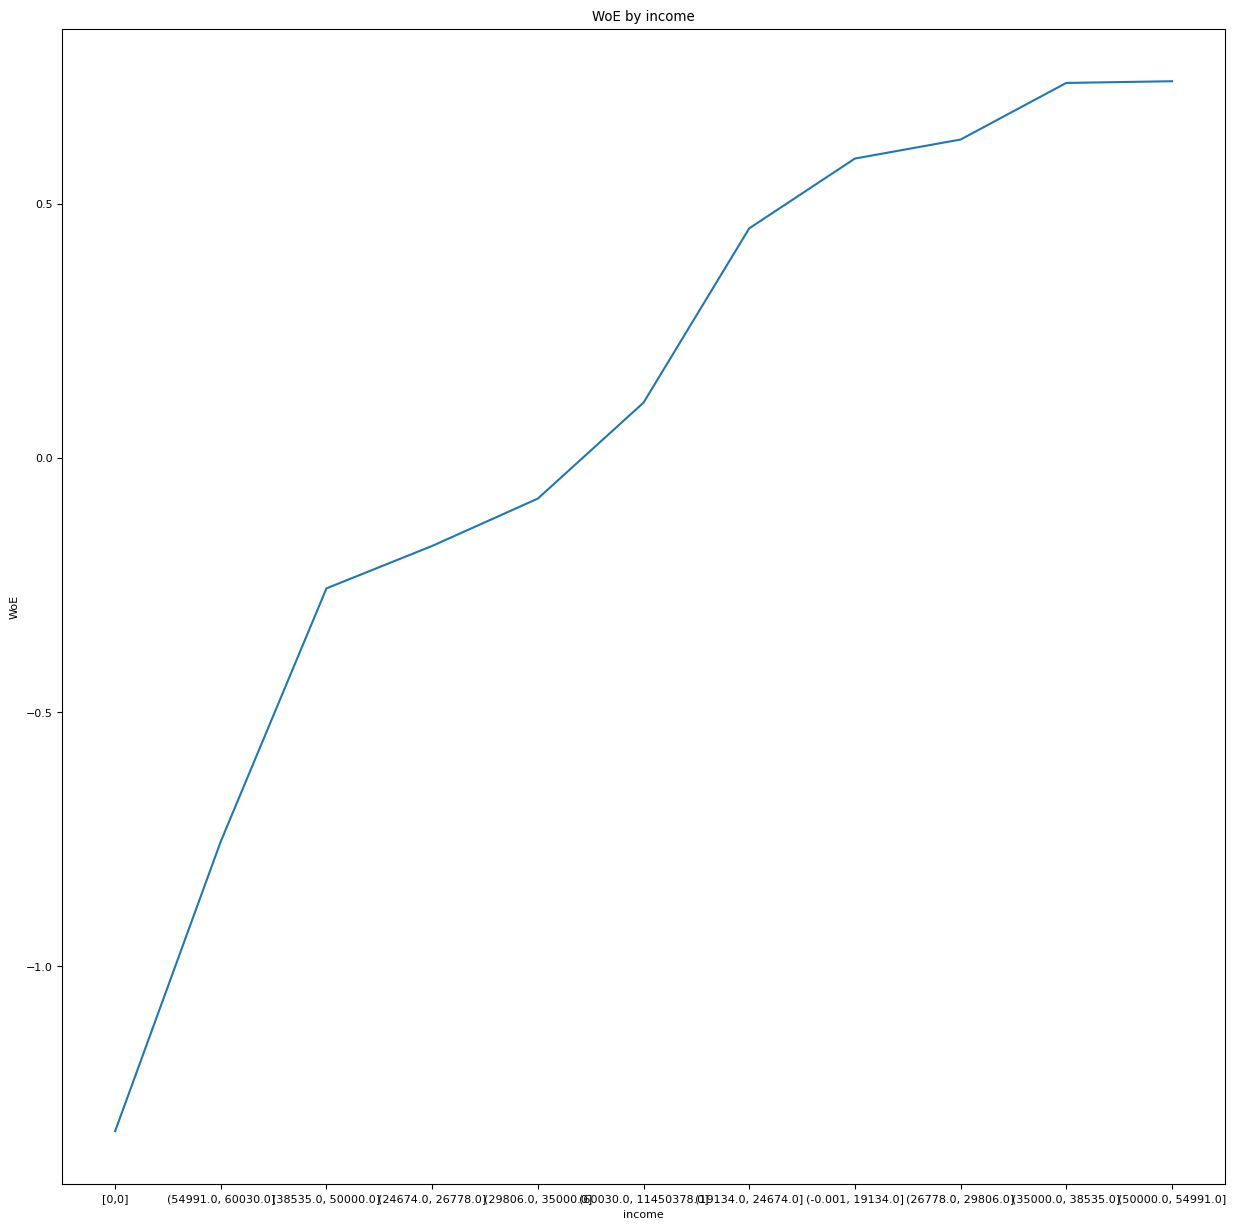

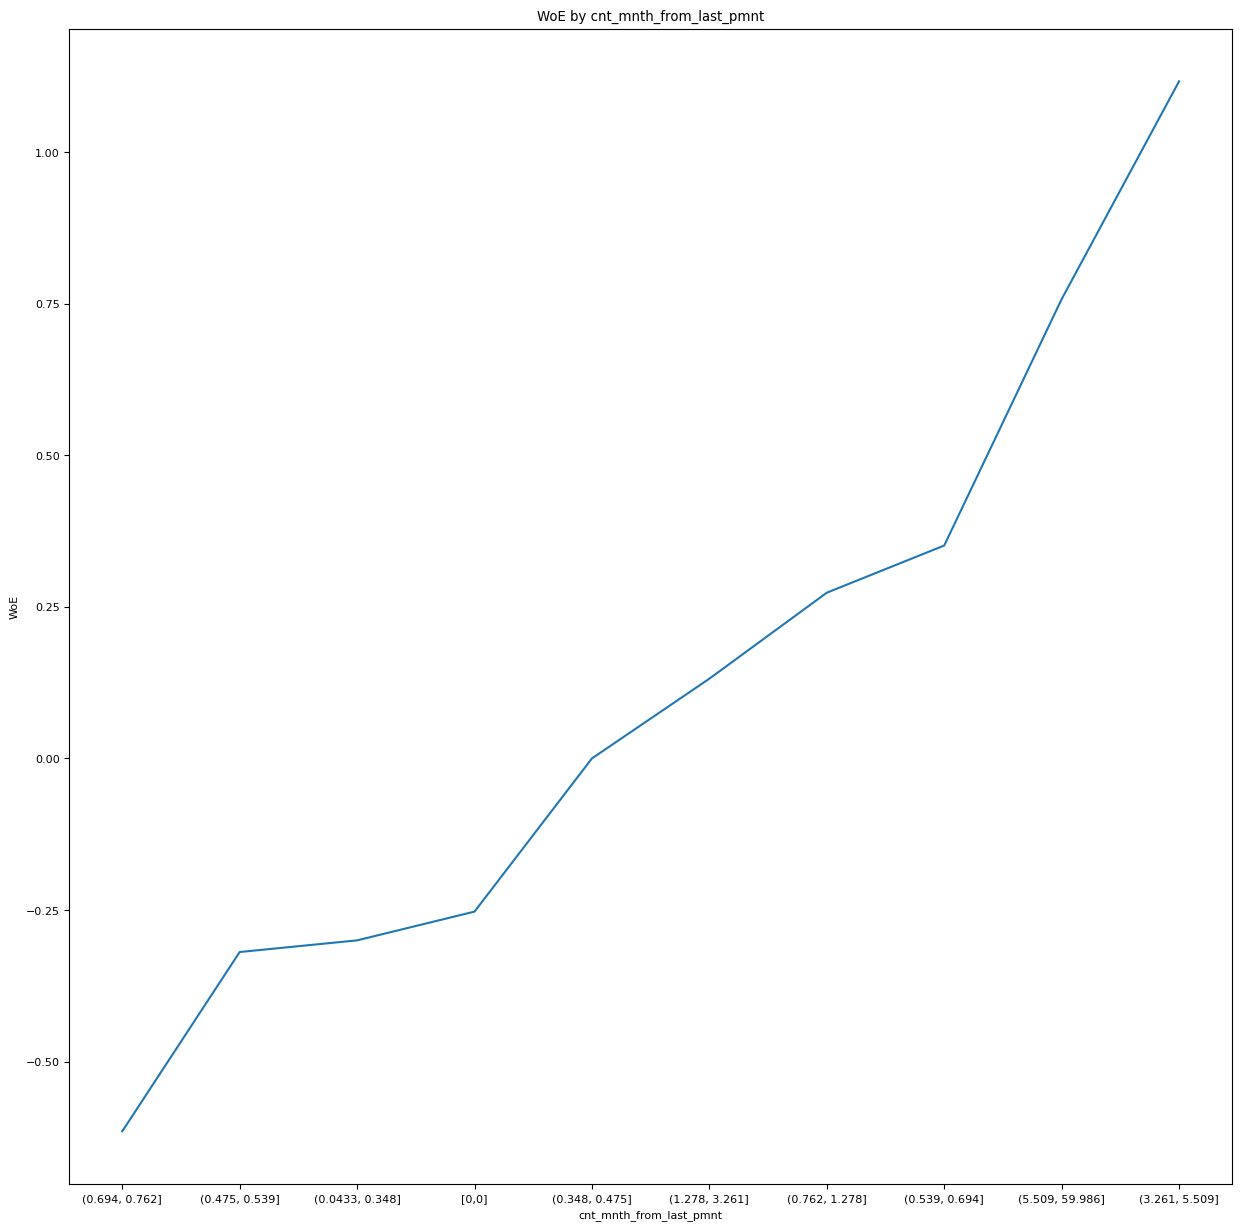

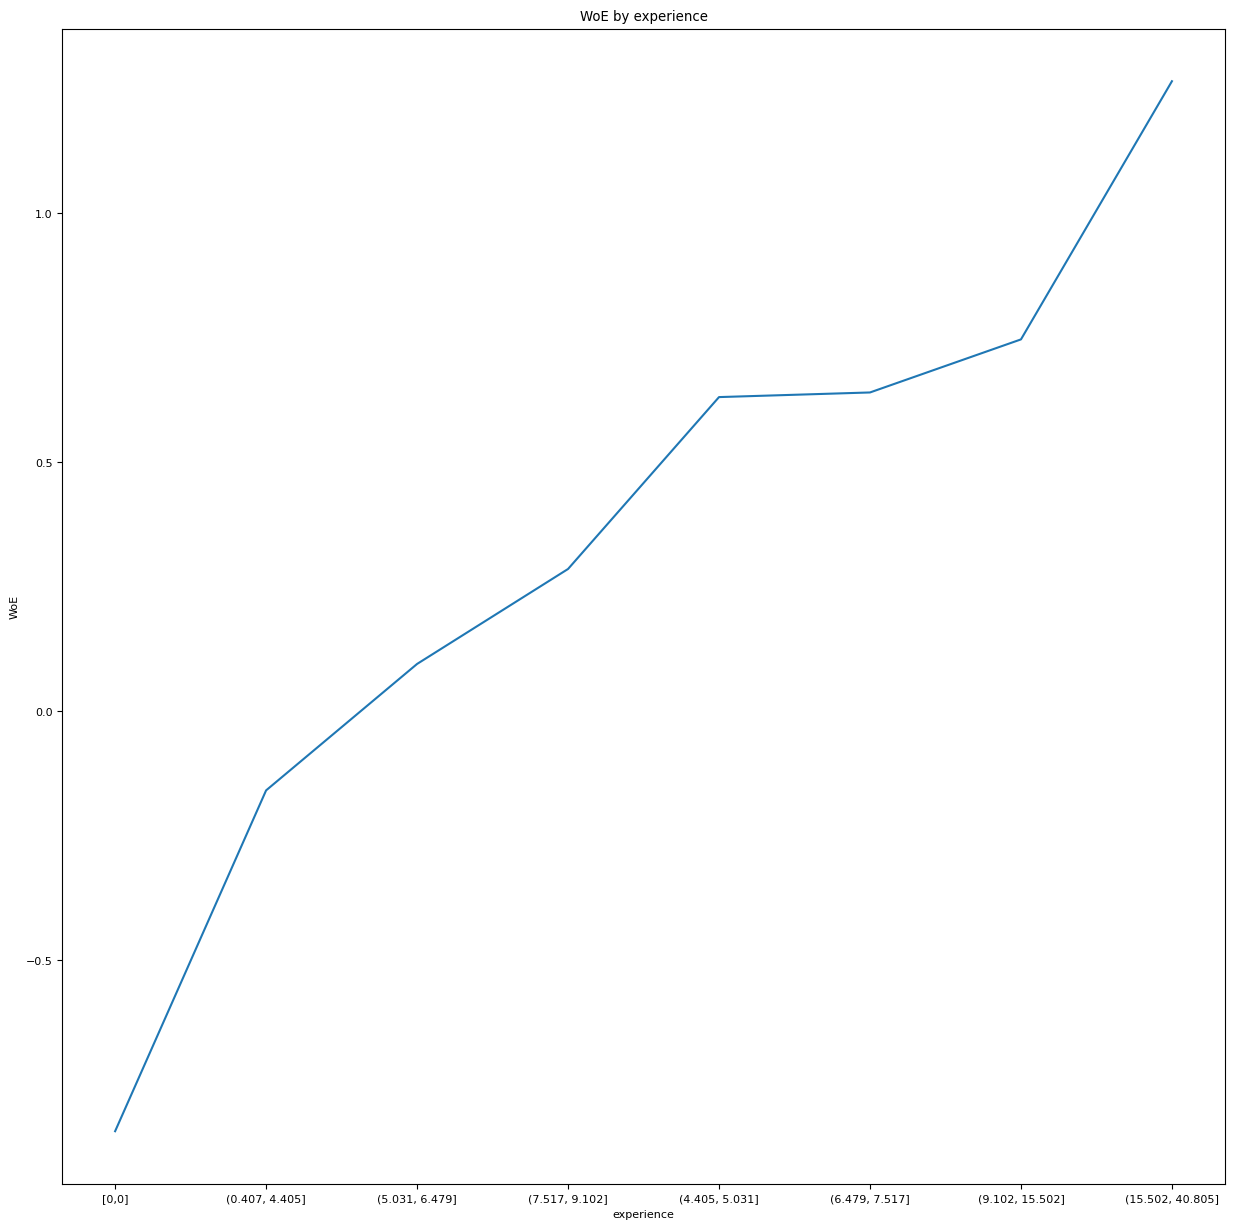

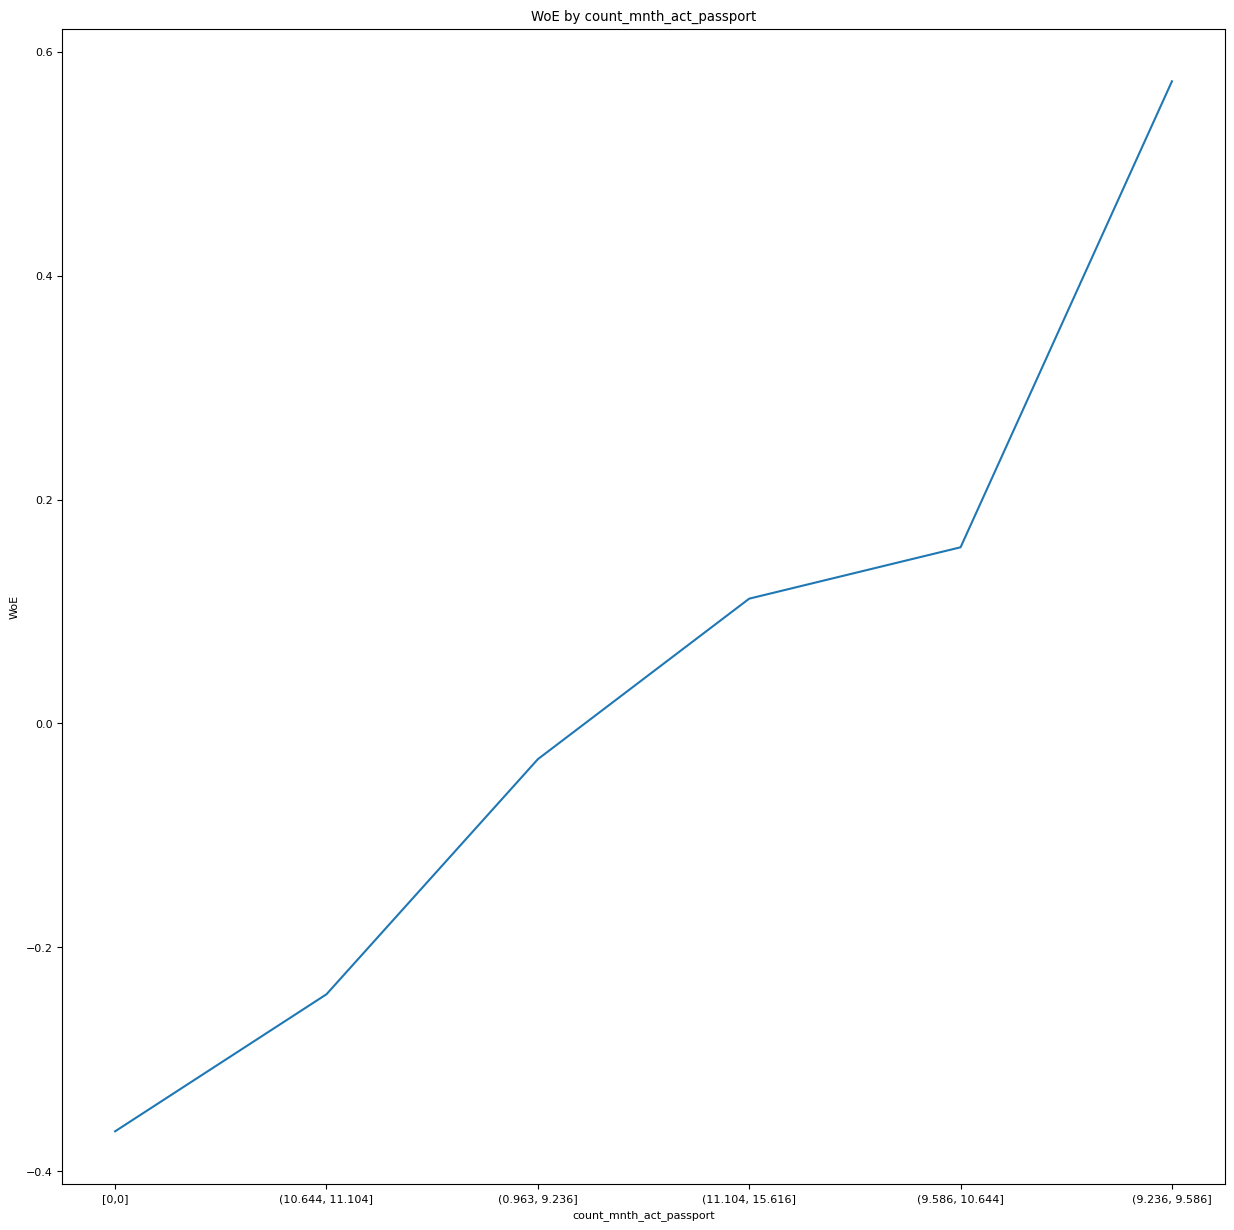

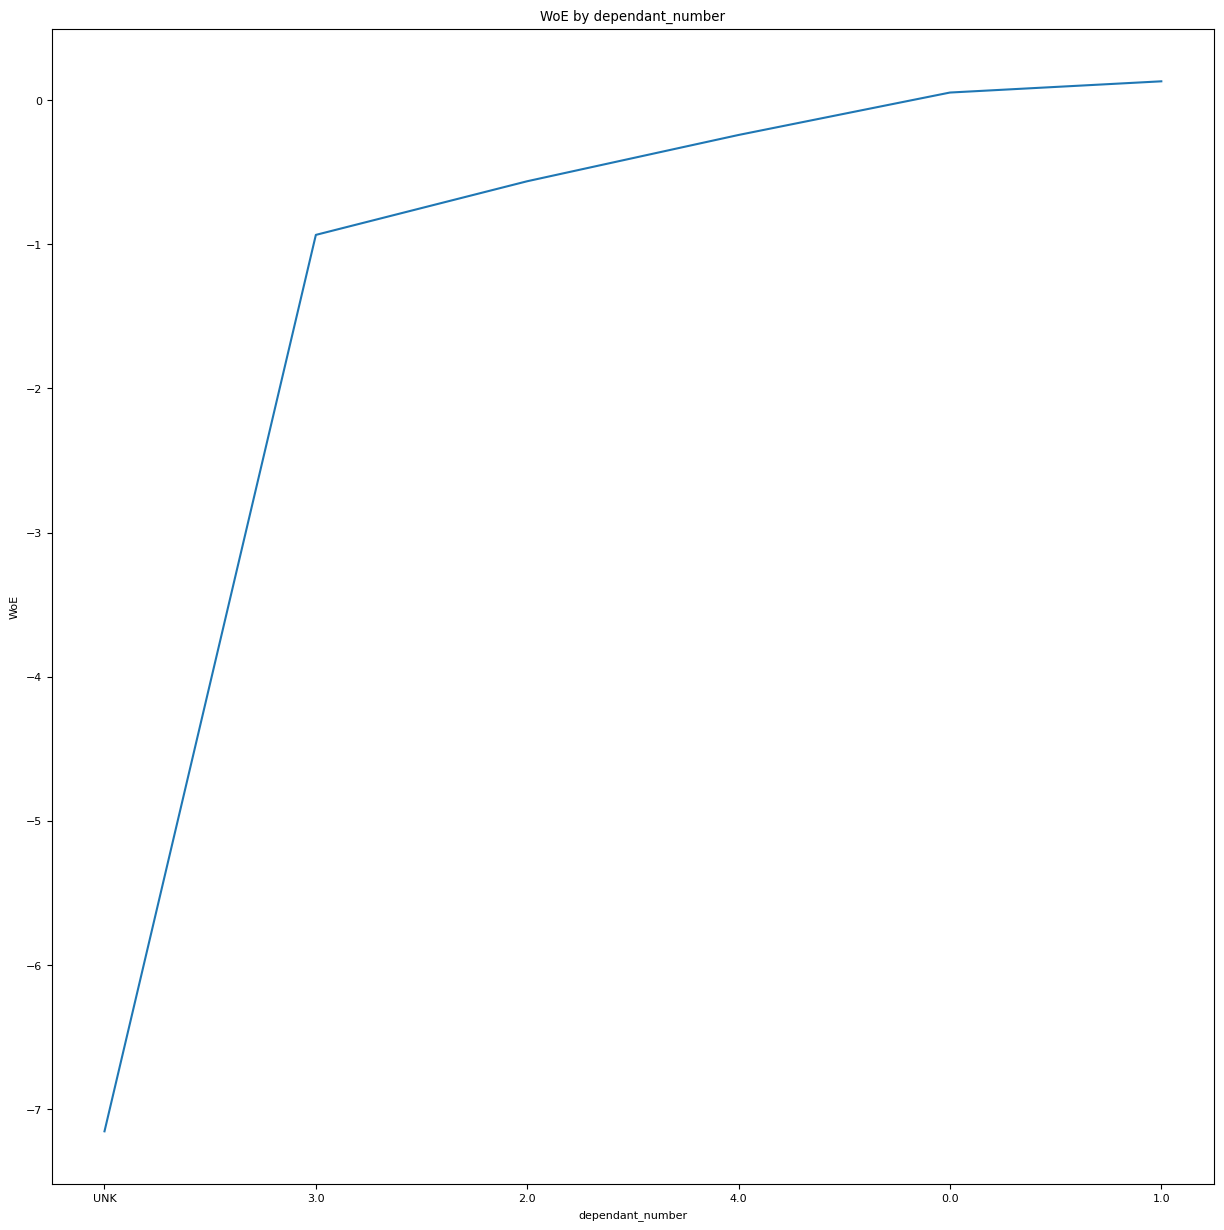

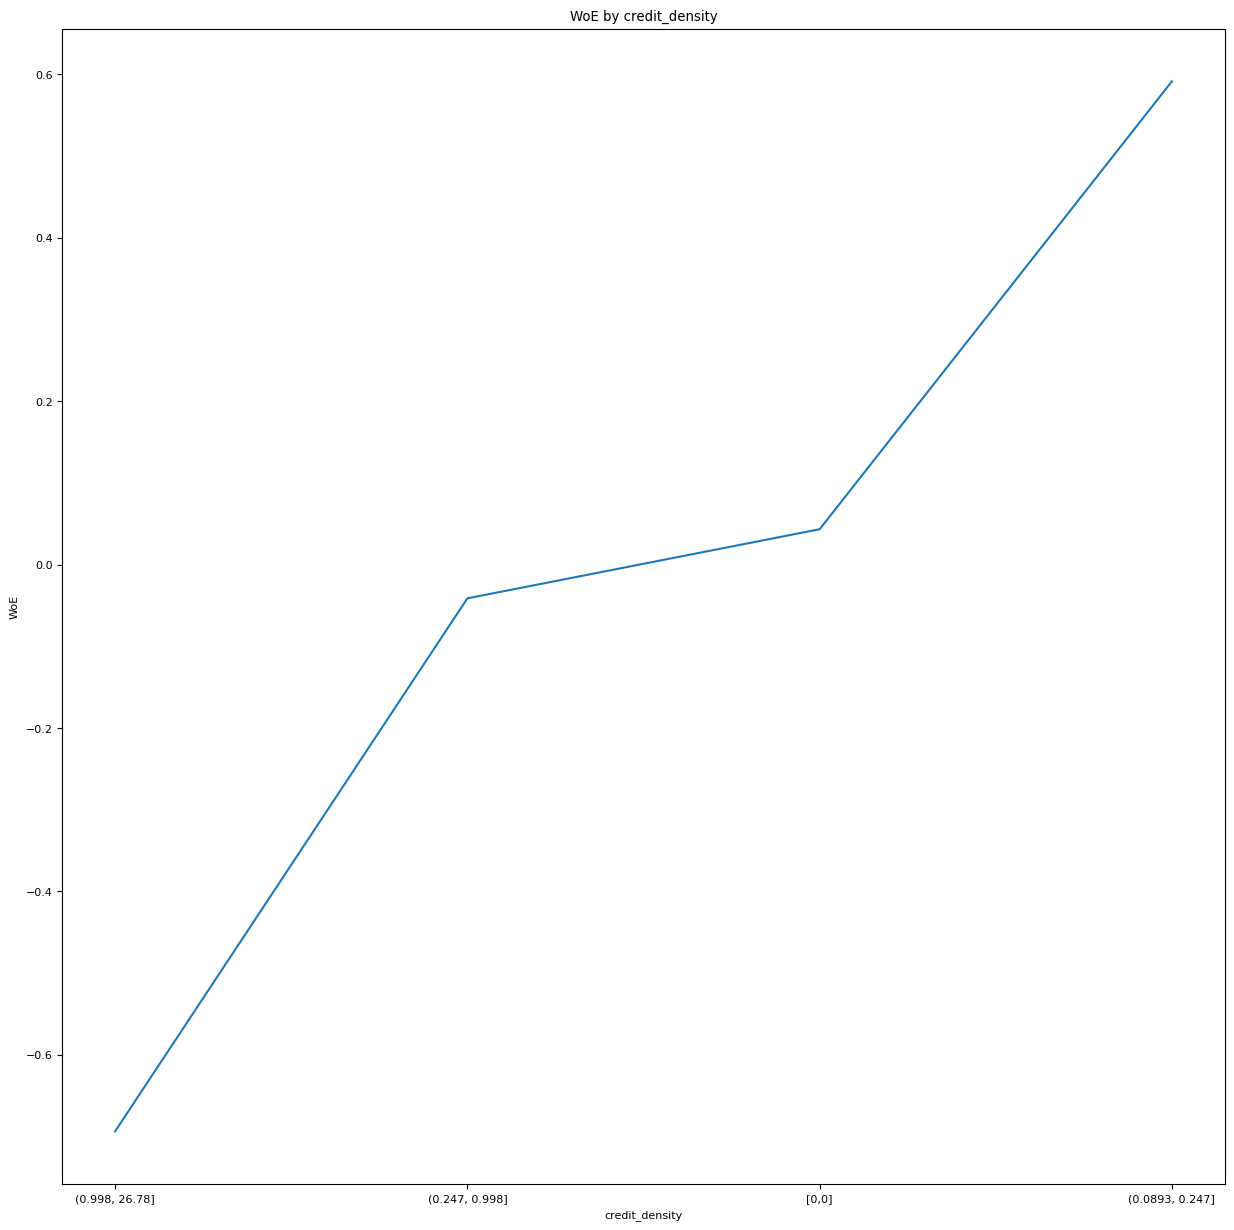

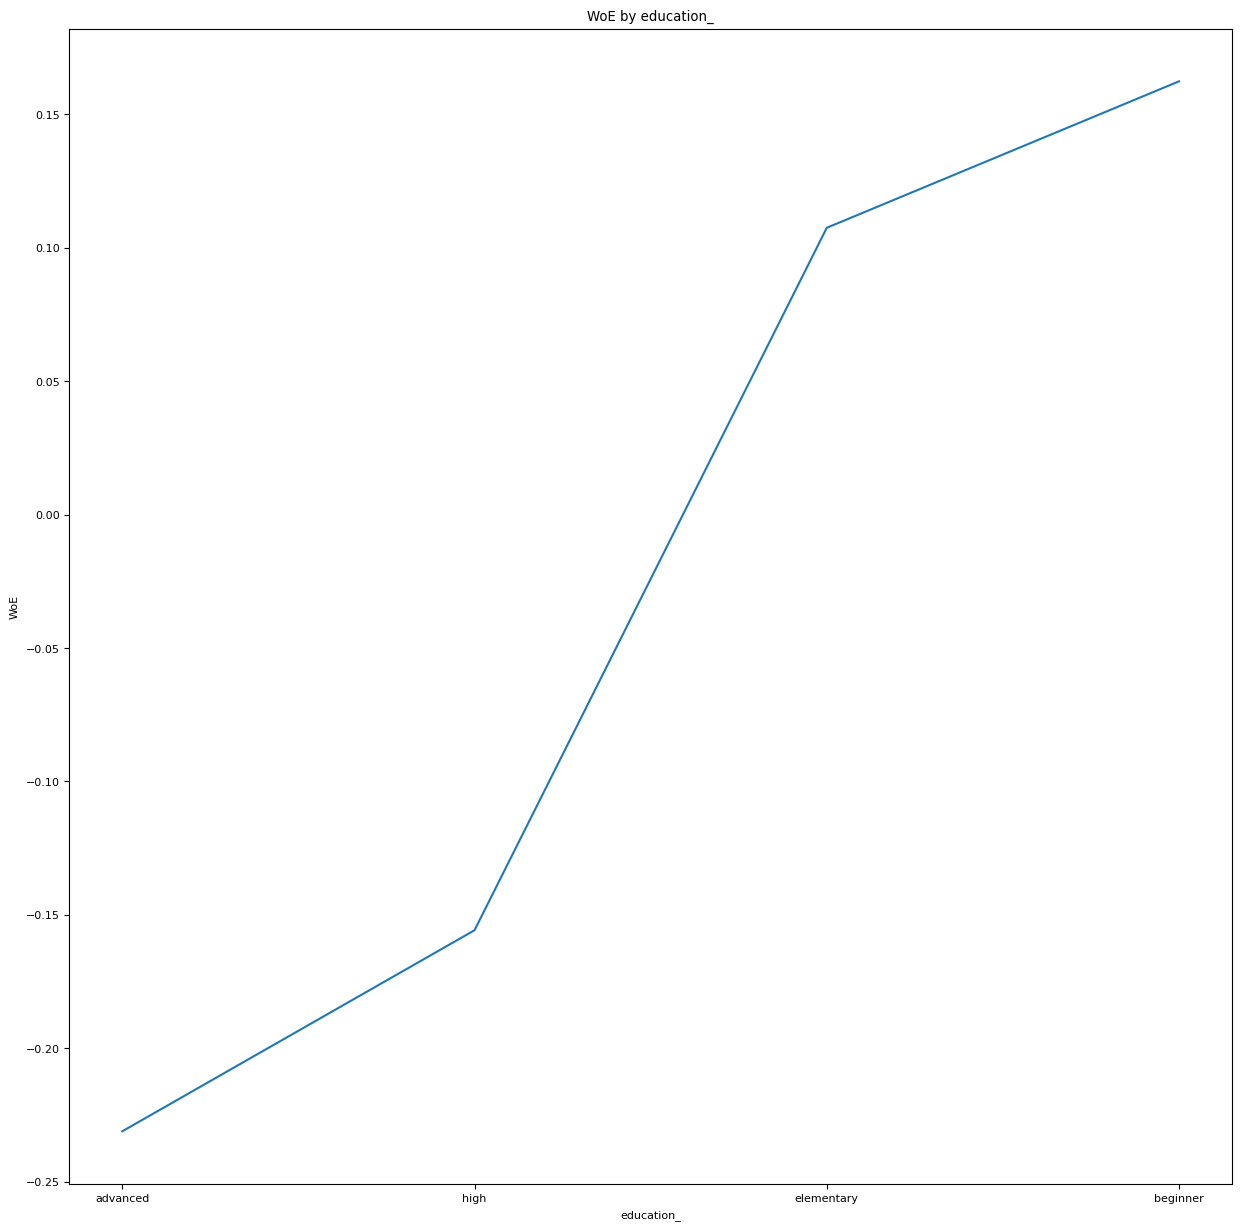

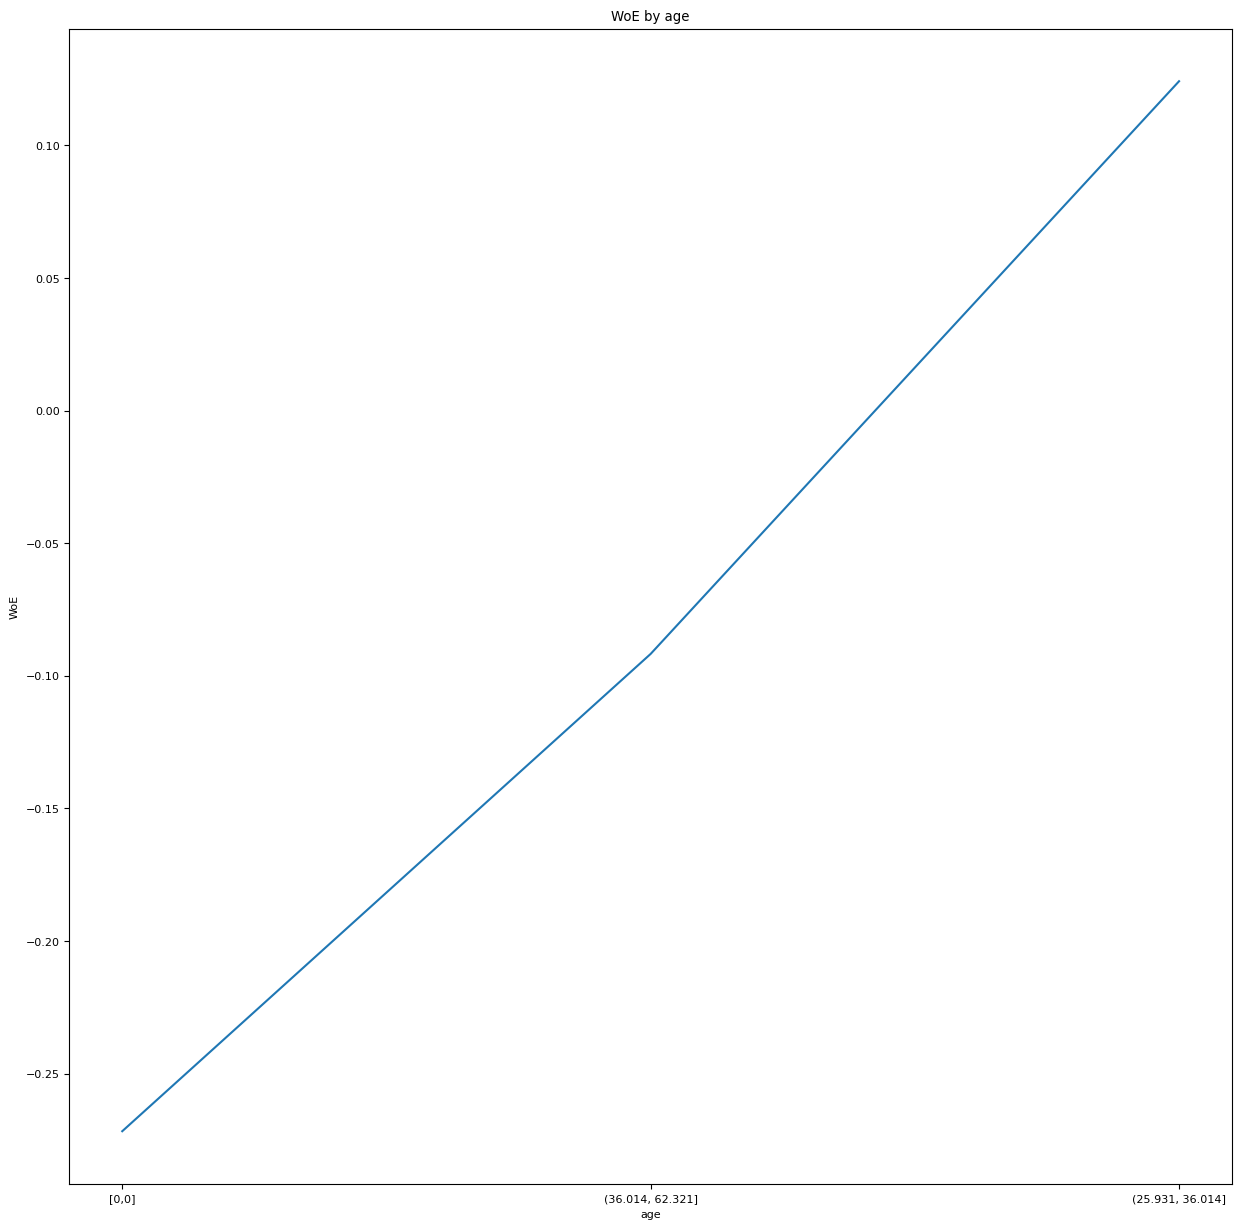

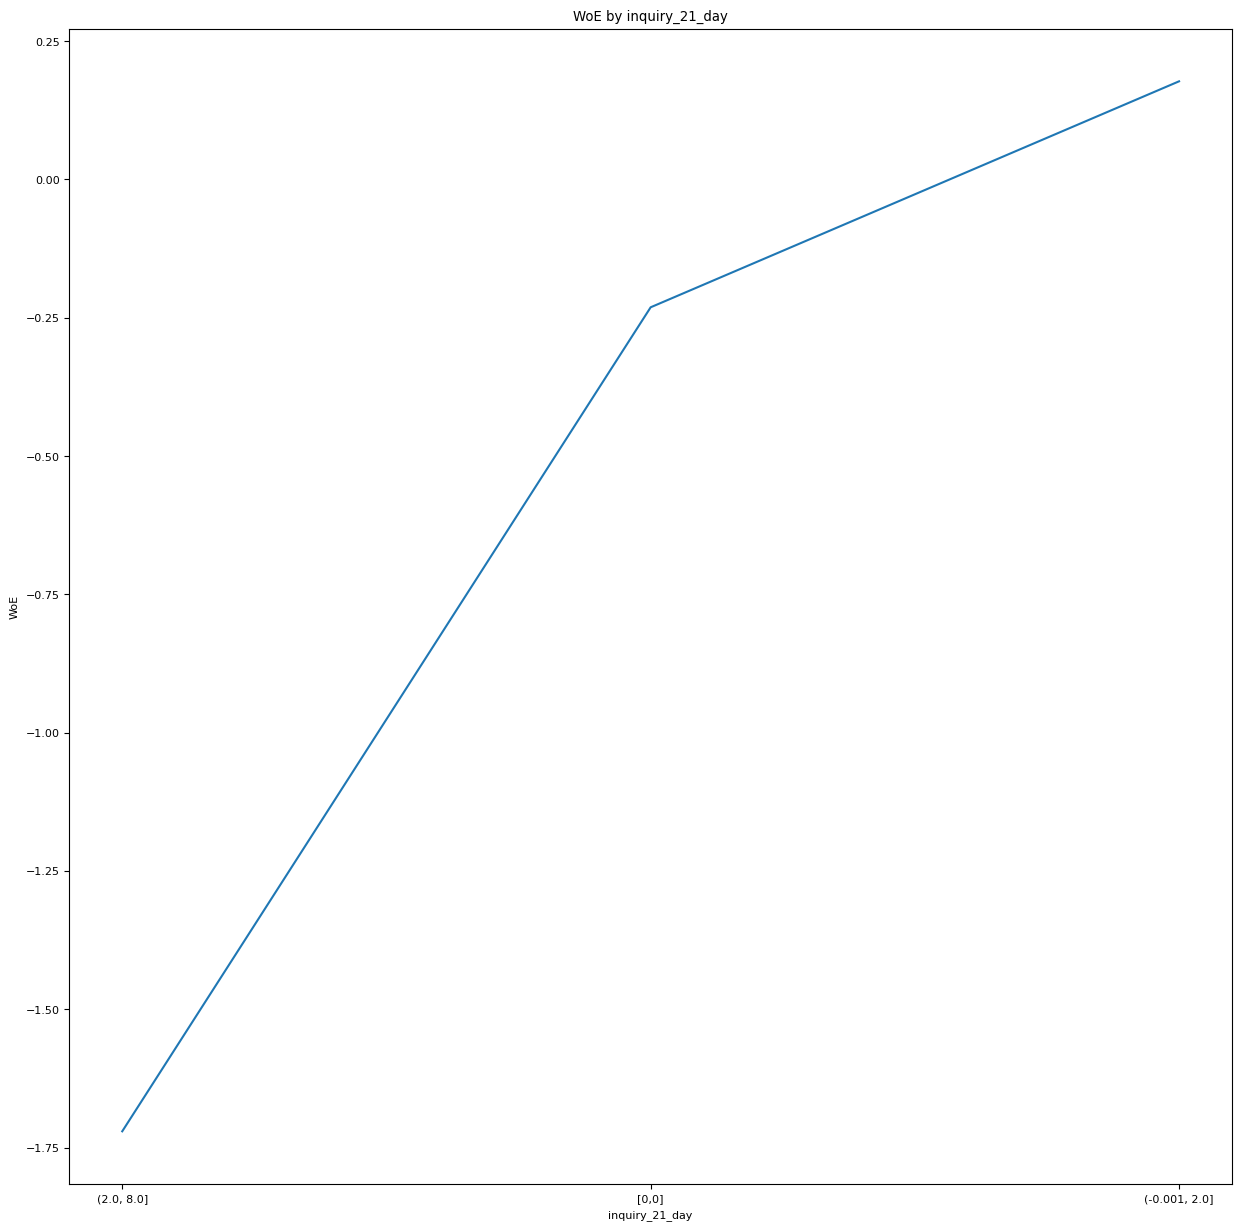

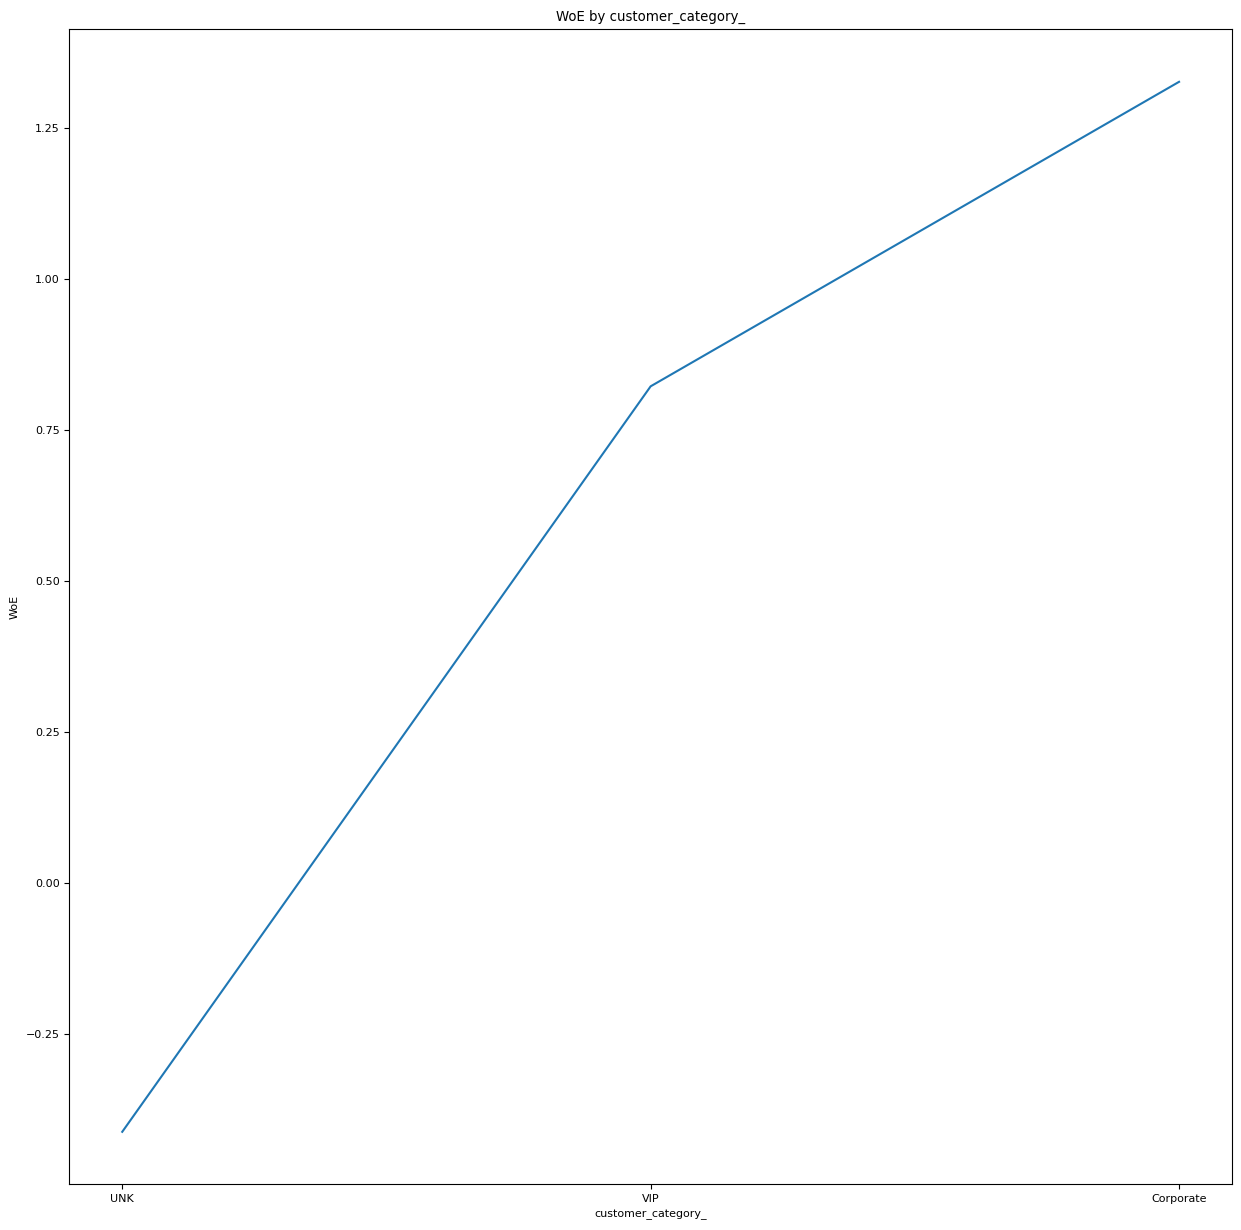

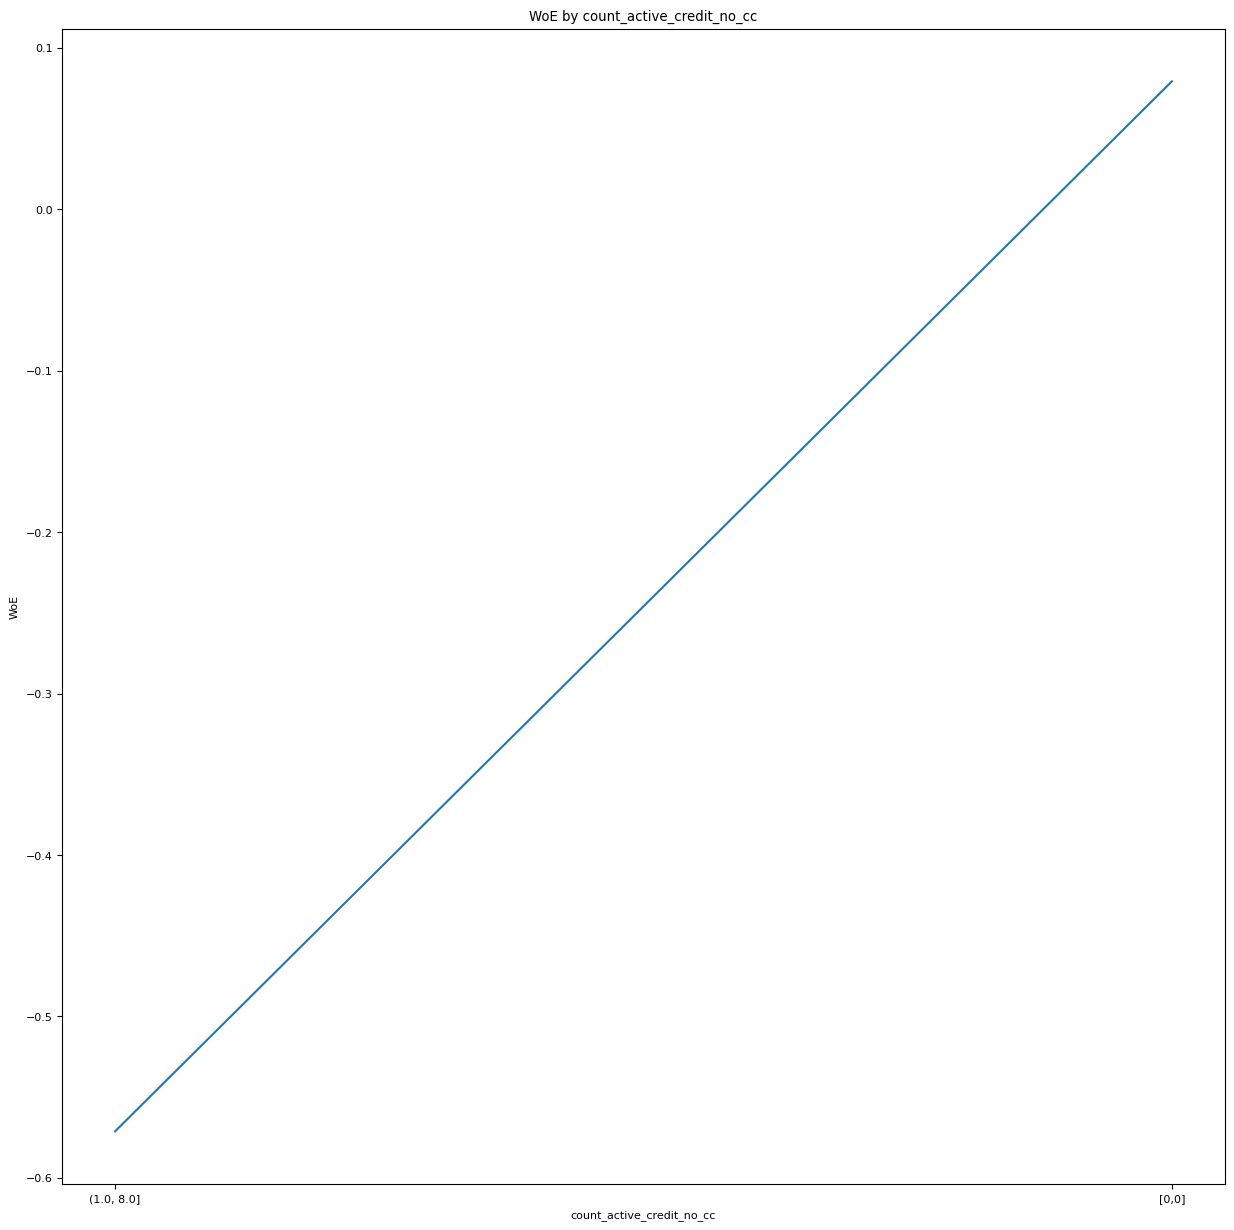

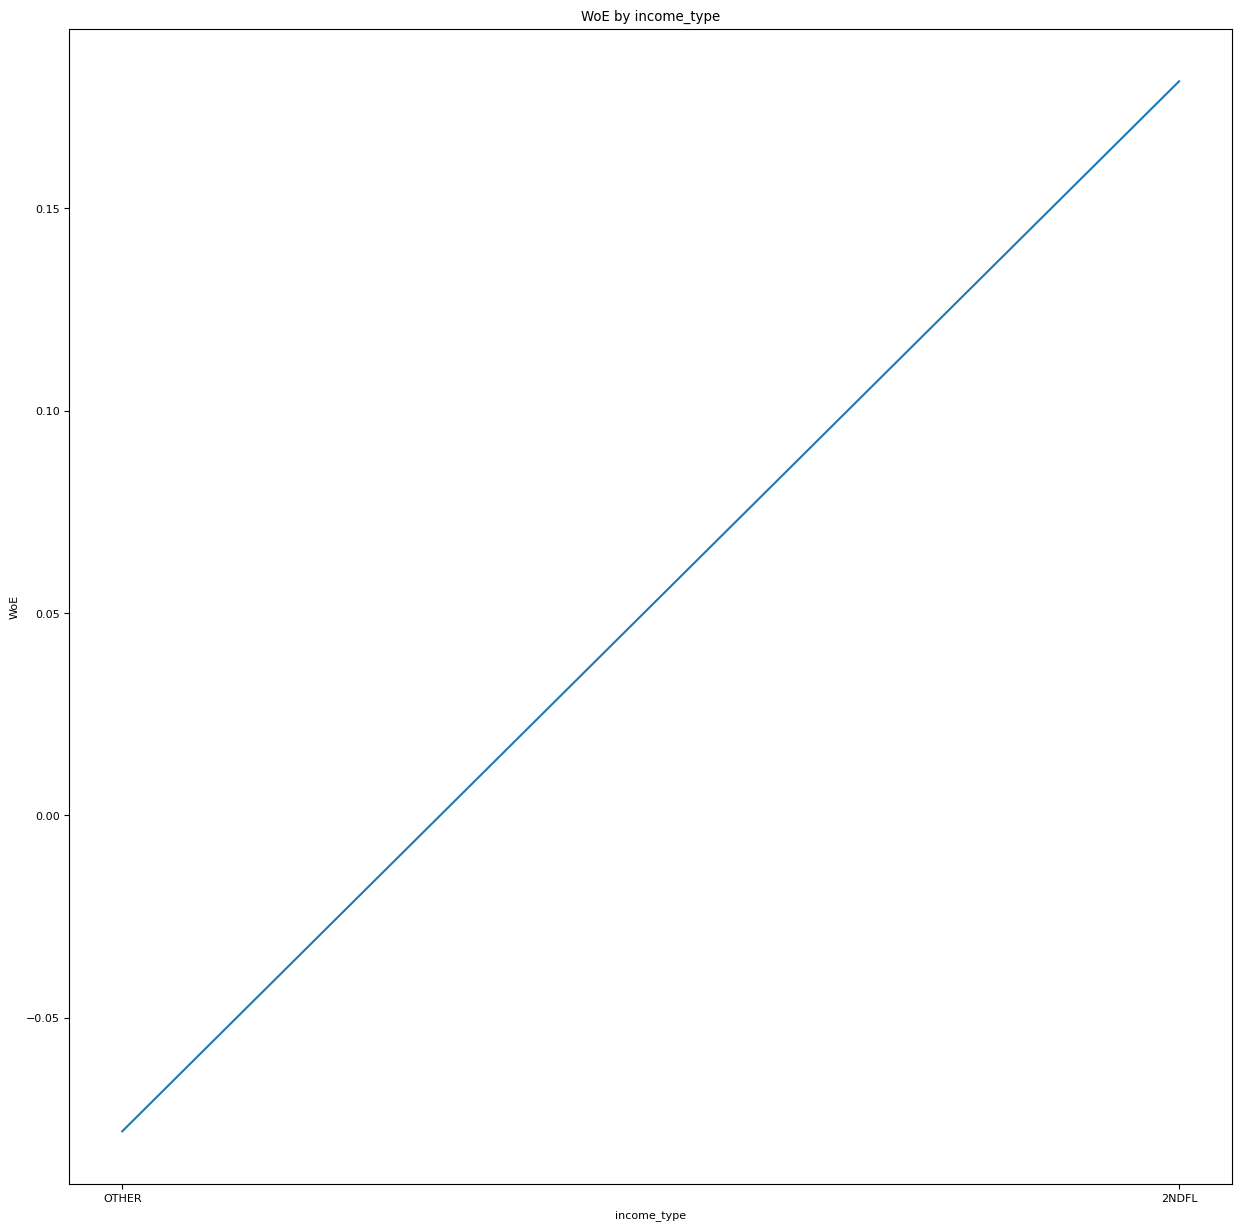

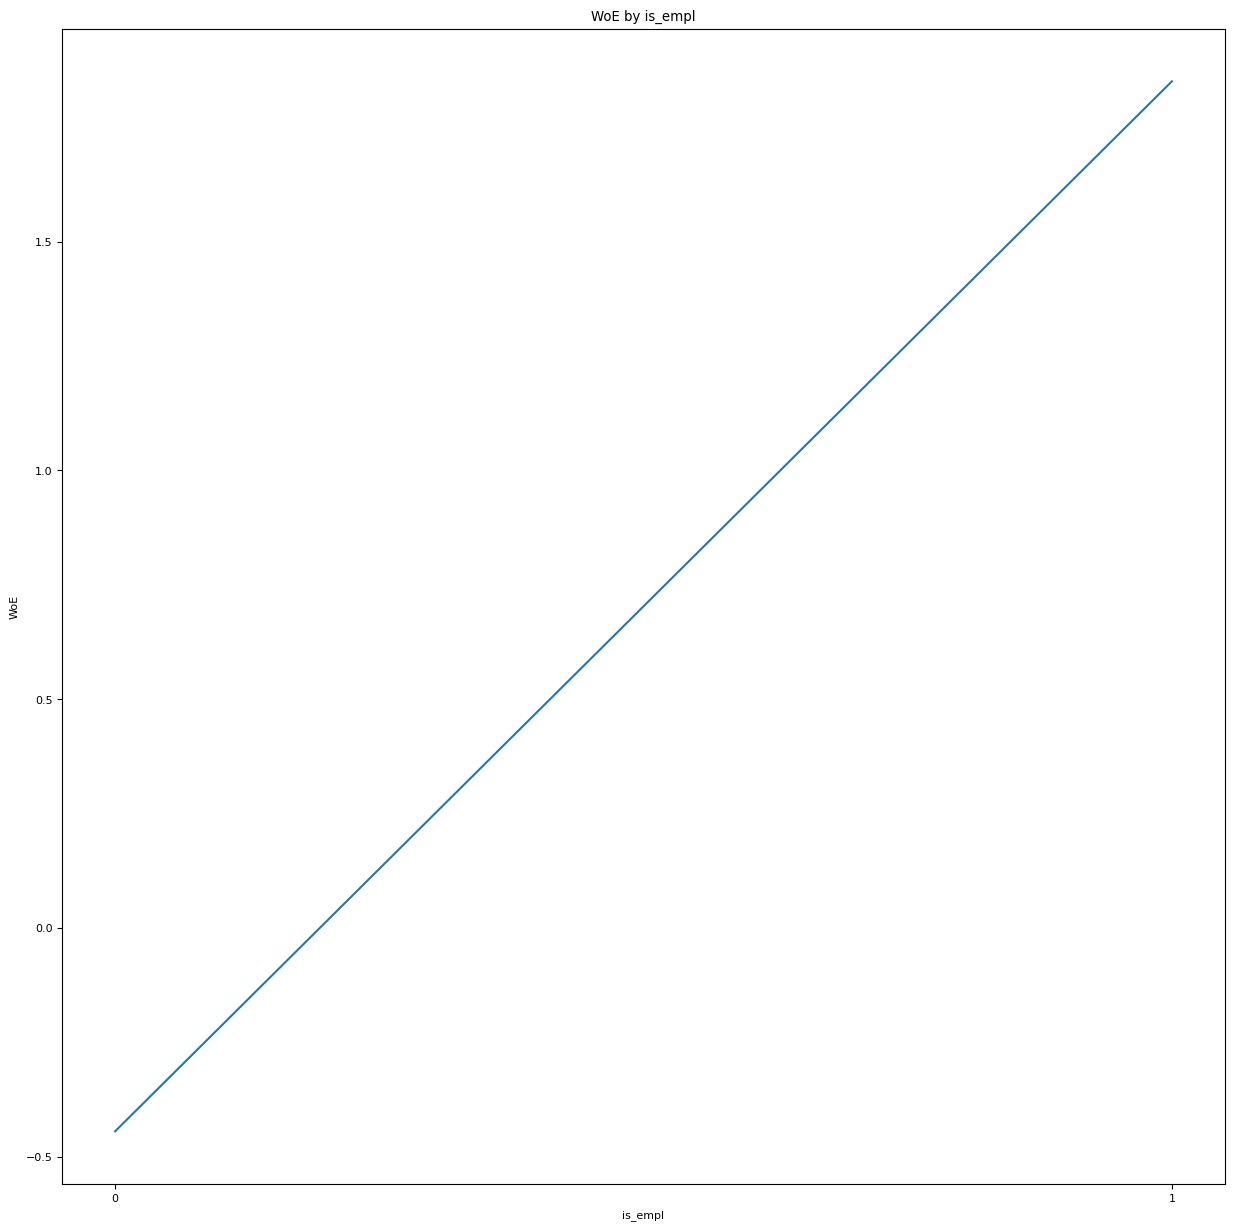

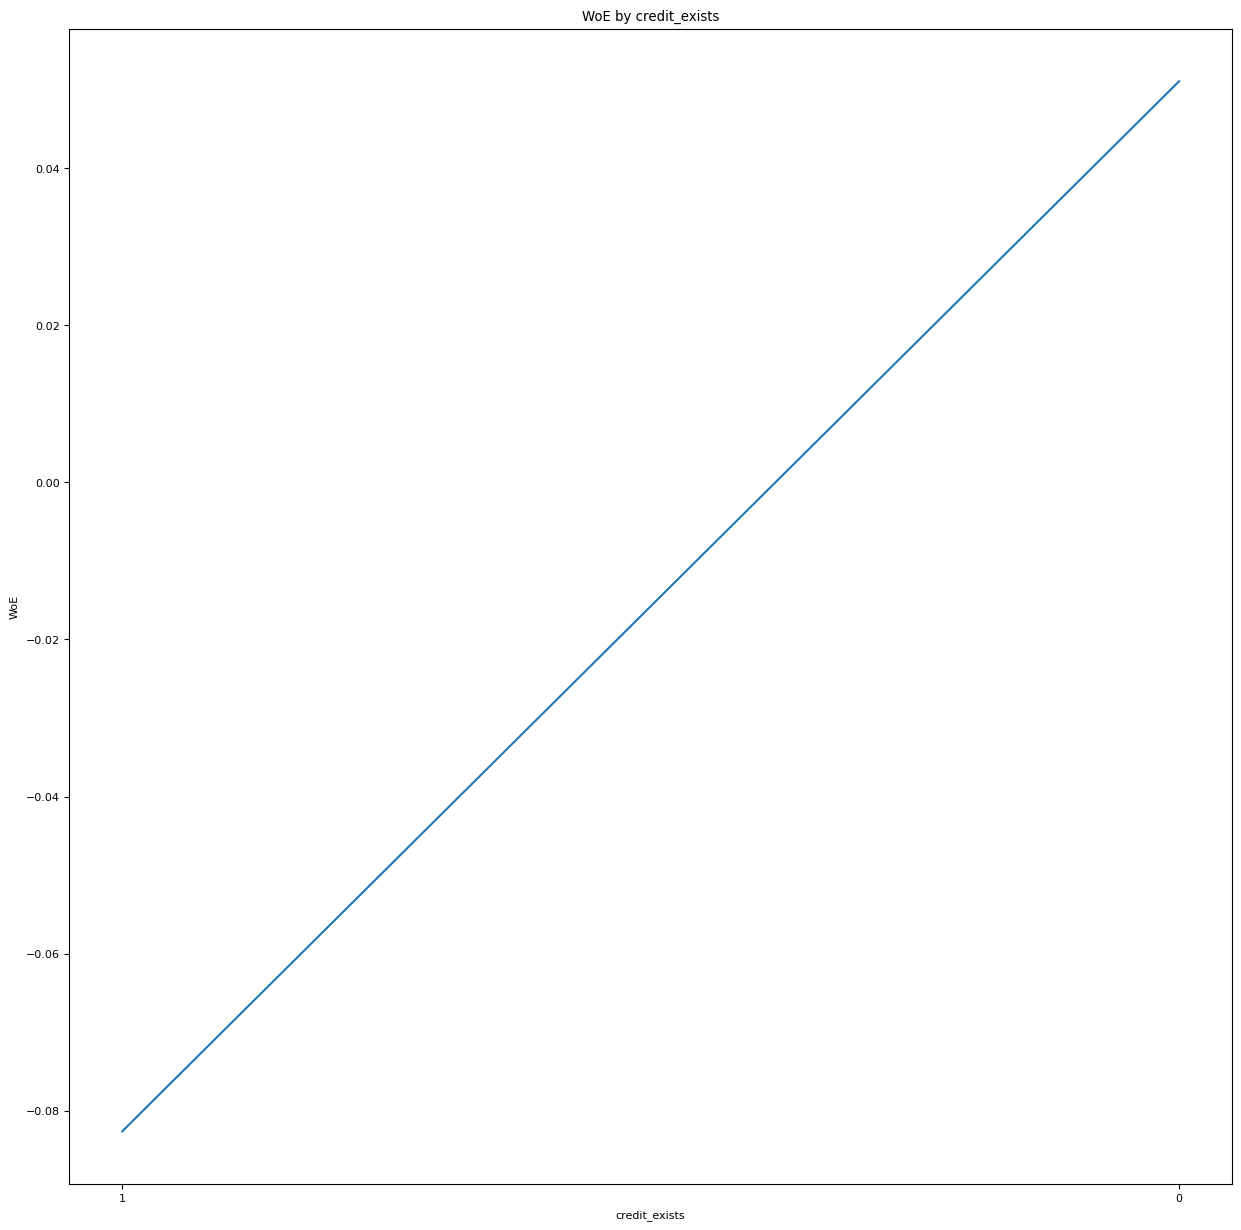

In [109]:
def plot_woe(i):
    woe_values = scorecard_coarse[scorecard_coarse['feature'] == i]['WoE'].values
    feature_values = [str(elem) for elem in scorecard_coarse[scorecard_coarse['feature'] == i]['Value'].values]
    
    if len(woe_values) > 0 and len(feature_values) > 0:
        plt.figure(figsize=(15, 15))
        plt.plot(feature_values, woe_values)
        plt.xlabel(i)
        plt.ylabel('WoE')
        plt.title(f'WoE by {i}')

for i in scorecard_coarse['feature'].value_counts().index:
    plot_woe(i)
#ура все монотонно!

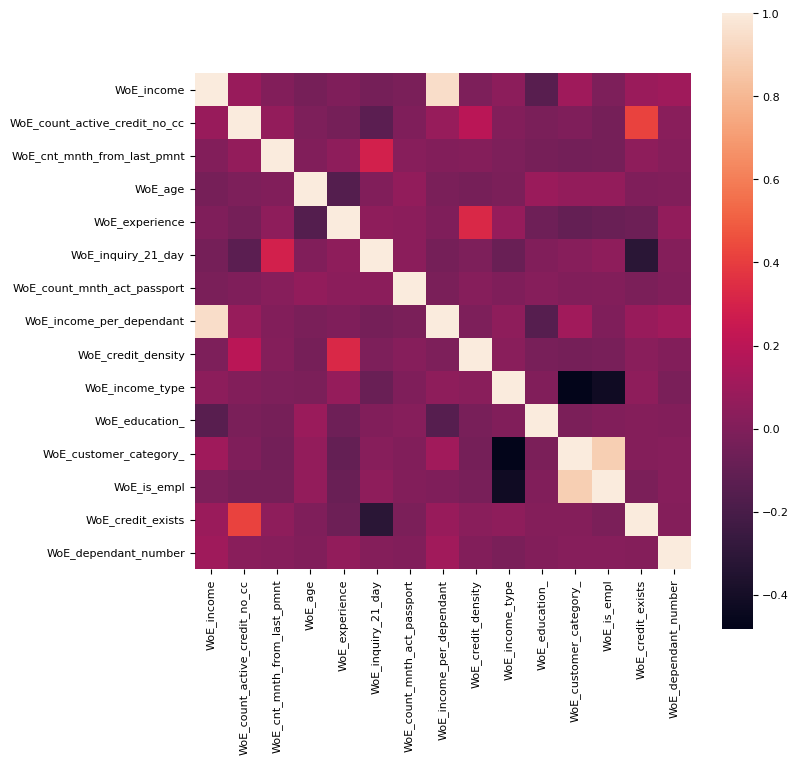

In [110]:
# матрица корреляций
correlations_woe = train.select_dtypes(include=['float64']).corr()
plt.figure(figsize=(8, 8))
sns.heatmap(correlations_woe, square=True)
plt.show() #еще раз глянем на корреляции до удаления

In [111]:
features = test.columns.tolist()
features.remove('uid')
features.remove('target')
# исключаем, так как IV<0.02 и сильная корреляция с is_EMPL
features.remove('WoE_income_type')
# исключаем, так как IV<0.02 
features.remove('WoE_age')

# исключаем, так как IV<0.02
features.remove('WoE_credit_exists')


features

['WoE_income',
 'WoE_count_active_credit_no_cc',
 'WoE_cnt_mnth_from_last_pmnt',
 'WoE_experience',
 'WoE_inquiry_21_day',
 'WoE_count_mnth_act_passport',
 'WoE_income_per_dependant',
 'WoE_credit_density',
 'WoE_education_',
 'WoE_customer_category_',
 'WoE_is_empl',
 'WoE_dependant_number']

построение и оценка логистической регресии - максимально 1 балл
- построена только логистическая регрессия - 0.3 балла
- сделана оценка модели ( roc auc, f1, и так далее) - 0.3 балла
- построена скоркарта - 0.4 балла

Напомню, что для скоркарты нужны следующие формулы (детали в лекции и семинаре)

Score_i =  (βi × WoE_i + α/n) × Factor + Offset/n, где

- Factor = pdo/ln(2)

- Offset = Target Score — (Factor × ln(Target Odds))

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train = train[features]
X_test = test[features]
y_train = train['target']
y_test = test['target']
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
display(X_train.head())
display(X_test.head())

,WoE_income,WoE_count_active_credit_no_cc,WoE_cnt_mnth_from_last_pmnt,WoE_experience,WoE_inquiry_21_day,WoE_count_mnth_act_passport,WoE_income_per_dependant,WoE_credit_density,WoE_education_,WoE_customer_category_,WoE_is_empl,WoE_dependant_number
0,-0.256660,0.079344,0.273334,-0.158931,0.177433,-0.031909,-0.241168,-0.041269,-0.23116,1.326993,1.850658,0.051887
1,-0.256660,0.079344,0.351124,-0.158931,0.177433,-0.031909,-0.241168,-0.041269,-0.23116,1.326993,1.850658,0.051887
2,-0.256660,-0.571199,-0.299939,-0.158931,0.177433,-0.031909,-0.241168,-0.041269,-0.23116,1.326993,1.850658,0.051887
3,-0.256660,0.079344,-0.299939,-0.158931,0.177433,-0.031909,-0.241168,-0.041269,-0.23116,1.326993,1.850658,0.051887
4,0.108495,0.079344,-0.299939,-0.158931,0.177433,-0.031909,0.533619,-0.041269,-0.23116,1.326993,1.850658,0.051887


,WoE_income,WoE_count_active_credit_no_cc,WoE_cnt_mnth_from_last_pmnt,WoE_experience,WoE_inquiry_21_day,WoE_count_mnth_act_passport,WoE_income_per_dependant,WoE_credit_density,WoE_education_,WoE_customer_category_,WoE_is_empl,WoE_dependant_number
0,0.451204,0.079344,0.273334,-0.843091,0.177433,-0.031909,0.420639,-0.693535,0.107534,-0.411257,-0.444676,0.051887
1,0.451204,-0.571199,0.273334,-0.158931,0.177433,-0.031909,0.420639,-0.693535,0.107534,-0.411257,-0.444676,0.051887
2,0.588480,0.079344,0.273334,-0.158931,0.177433,-0.031909,0.420639,-0.693535,0.107534,-0.411257,-0.444676,0.051887
3,0.451204,0.079344,0.131559,-0.158931,0.177433,-0.031909,0.420639,-0.693535,0.107534,-0.411257,-0.444676,0.051887
4,0.451204,0.079344,0.131559,-0.158931,0.177433,-0.031909,0.420639,-0.693535,0.107534,-0.411257,-0.444676,0.051887


In [113]:
features_coefs = pd.DataFrame(zip(X_train.columns, np.transpose(logreg.coef_.tolist()[0])),
                              columns=['features', 'coef'])

intercept = logreg.intercept_
print('intercept=', intercept)
features_coefs

intercept= [-3.79050609]


,features,coef
0,WoE_income,-0.895248
1,WoE_count_active_credit_no_cc,-0.878475
2,WoE_cnt_mnth_from_last_pmnt,-0.870227
3,WoE_experience,-0.774068
4,WoE_inquiry_21_day,-0.787986
5,WoE_count_mnth_act_passport,-0.865295
6,WoE_income_per_dependant,-0.123099
7,WoE_credit_density,-0.573076
8,WoE_education_,-1.521585
9,WoE_customer_category_,-0.008256


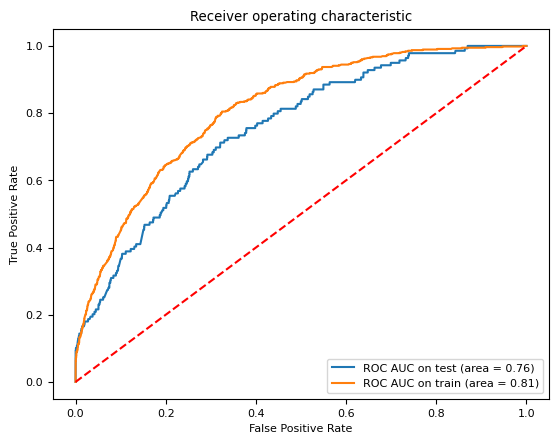

In [114]:
from sklearn.metrics import roc_auc_score
y_pred = logreg.predict(X_test)

plt.rc("font", size=8)

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

logit_roc_auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])



logit_roc_auc_train = roc_auc_score(y_train, logreg.predict_proba(X_train)[:,1])
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, logreg.predict_proba(X_train)[:,1])


plt.figure()
plt.plot(fpr, tpr, label='ROC AUC on test (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr_train, tpr_train, label='ROC AUC on train (area = %0.2f)' % logit_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


TPR на train равный 0.8046 означает, что модель правильно классифицирует 80.46% клиентов, которые реально являются дефолтными, как дефолтных.

FPR  на train равный 0.3246 означает, что модель неправильно классифицирует 32.46% клиентов, которые на самом деле не являются дефолтными, как дефолтных.

Исходя из этих результатов, можно сделать вывод, что модель имеет хороший уровень выявления дефолтных клиентов (TPR), однако при этом существует высокий процент ложноположительных срабатываний (FPR), что может привести к недопустимым финансовым потерям для банка.

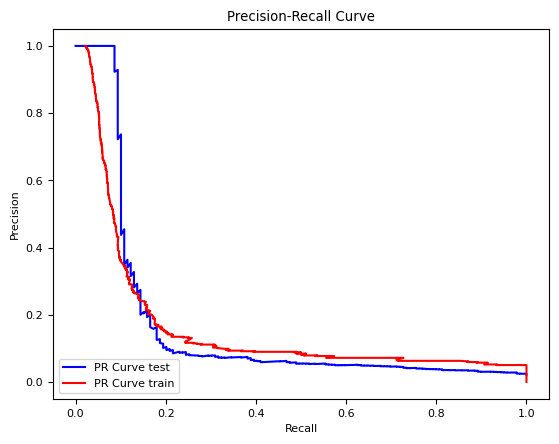

Best F1-Score on Test Data: 0.18867924528301888
F1-Score on Training Data: 0.17209302325581396


In [115]:
from sklearn.metrics import precision_recall_curve, f1_score
#глянем, что происходит с точностью и полнотой на графике
precision, recall, thresholds_pr = precision_recall_curve(y_test, logreg.predict_proba(X_test)[:,1])
f1 = 2 * (precision * recall) / (precision + recall)
precision_train, recall_train, thresholds_pr_train = precision_recall_curve(y_train, logreg.predict_proba(X_train)[:,1])

plt.figure()
plt.plot(recall, precision, color='b', label='PR Curve test')
plt.plot(precision_train, recall_train, color='r', label='PR Curve train')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

best_threshold = thresholds_pr[np.argmax(f1)]
f1_score_test = max(f1)
print("Best F1-Score on Test Data:", f1_score_test)

y_preds_train = (logreg.predict_proba(X_train)[:,1] > best_threshold).astype(int)
f1_score_train = f1_score(y_train, y_preds_train)
print("F1-Score on Training Data:", f1_score_train)

Для задачи кредитного скоринга это означает, что модель способна достаточно хорошо находить дефолтных заемщиков (recall) и при этом минимизировать количество ложноположительных результатов (precision). Однако значение F1-Score довольно низкое, что может свидетельствовать о том, что модель не идеально работает на тестовых данных.

F1-Score на обучающих данных равный 0.1721 указывает на схожие результаты, что и на тестовых данных. Это говорит о том, что модель сохраняет баланс между точностью и полнотой как на обучающих, так и на тестовых данны 
Попробуем улучшить результат.
х.

In [146]:
fpr, tpr, optimal_threshold_train = metrics.roc_curve(y_train, logreg.predict_proba(X_train)[:,1])
gmeans = np.sqrt(tpr + (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
optimal_threshold = optimal_threshold_train[ix]
print('Best Threshold=%f, G-Mean=%.3f' %   (optimal_threshold_train[ix], gmeans[ix])) #ЗАПОМНИМ ДЛЯ РАЗМЕТКИ РЕДЖЕКТА
optimal_threshold

Best Threshold=0.021526, G-Mean=1.217


0.021526322196707786

In [117]:
# калибровка
scorecard_coarse['features'] = 'WoE_'+scorecard_coarse['feature'].astype(str)
scorecard_coarse = scorecard_coarse.merge(features_coefs,how='inner', on='features')
scorecard_coarse = scorecard_coarse.drop(columns = 'features')
scorecard_coarse

,feature,Value,WoE,coef
0,income,"[0,0]",-1.324157,-0.895248
1,income,"(54991.0, 60030.0]",-0.754236,-0.895248
2,income,"(38535.0, 50000.0]",-0.256660,-0.895248
3,income,"(24674.0, 26778.0]",-0.173266,-0.895248
4,income,"(29806.0, 35000.0]",-0.080160,-0.895248
...,...,...,...,...
66,dependant_number,3.0,-0.935505,-0.799401
67,dependant_number,2.0,-0.563390,-0.799401
68,dependant_number,4.0,-0.242358,-0.799401
69,dependant_number,0.0,0.051887,-0.799401


<Figure size 640x480 with 0 Axes>

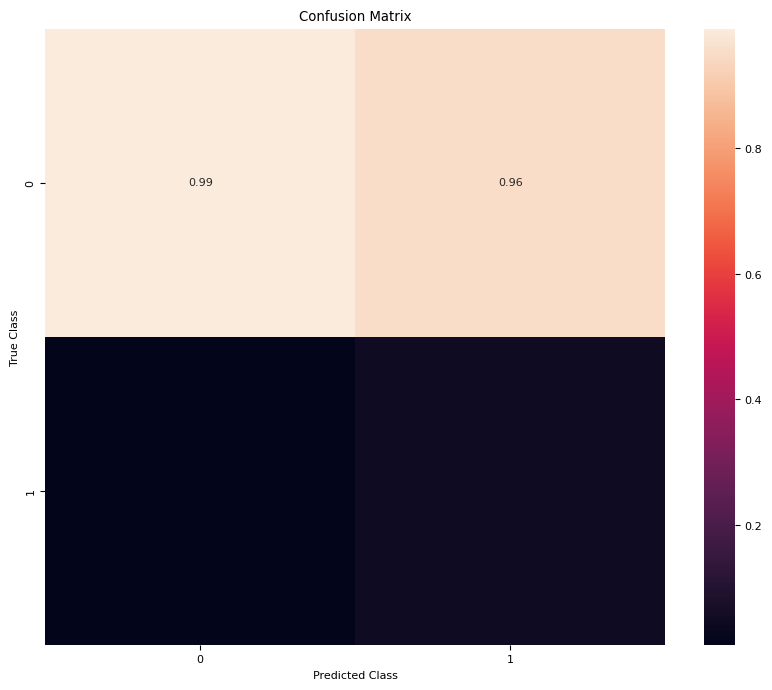

array([[0.9908558, 0.9554764],
       [0.0091442, 0.0445236]])

In [118]:
from sklearn.metrics import confusion_matrix
fpr, tpr, thresholds = roc_curve(y_train, logreg.predict_proba(X_train)[:,1])
gmeans = np.sqrt(tpr + (1-fpr))
ix = np.argmax(gmeans)
cutoff = thresholds[ix]
predictions_01 = np.where(logreg.predict_proba(X_test)[:,1] > cutoff, 1, 0) #Turn probability to 0-1 binary output 
test['predictions_01'] = [el for el in predictions_01]

plt.figure()
cm = confusion_matrix(y_test, test['predictions_01'], normalize='pred')
labels = ['0', '1']
plt.figure(figsize=(10,8))
sns.heatmap(cm,
            xticklabels = labels,
            yticklabels = labels,
            annot = True,
            # fmt='d',
            fmt=".2f",
            );
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()
cm

(считаю, что 0 - positive)

True Positive: 0.9908558 - модель правильно предсказала недефолтных заемщиков.

False Positive: 0.9554764 - модель ошибочно предсказала недефолтных заемщиков как дефолтных.

True Negative: 0.0445236 - модель правильно предсказала дефолтных заемщиков.

False Negative: 0.0091442 - модель ошибочно предсказала дефолтных заемщиков как недефолтных.

 
Что это значит:
- Модель имеет высокую способность правильно определять недефолтных заемщиков TP, что хорошо для банка, так как это помогает избежать рисков.
- Однако модель совершает значительное количество ложноположительных ошибок FP, что может привести к недополучению доходов от потенциально хороших заемщиков.


Модель нуждается в доработке для улучшения идентификации дефолтных заемщиков и снижения ложноположительных ошибок. Далее попробуем разметить reject данные и посмотрим, на сколько результат поменяется. Возможно, нужно подобрать гиперпараметры для логрегрессии (но я кстати не знаю, на сколько это приветствуется на работе, это как-то влияет на интерпретируемость?))

In [119]:
pdo = 20
Target_Odds = 50
Target_Score = 600

Factor = pdo/np.log(2)
Offset = Target_Score-(Factor*np.log(Target_Odds))
print(Factor, Offset)

28.85390081777927 487.1228762045055


In [120]:
scorecard_coarse

,feature,Value,WoE,coef
0,income,"[0,0]",-1.324157,-0.895248
1,income,"(54991.0, 60030.0]",-0.754236,-0.895248
2,income,"(38535.0, 50000.0]",-0.256660,-0.895248
3,income,"(24674.0, 26778.0]",-0.173266,-0.895248
4,income,"(29806.0, 35000.0]",-0.080160,-0.895248
...,...,...,...,...
66,dependant_number,3.0,-0.935505,-0.799401
67,dependant_number,2.0,-0.563390,-0.799401
68,dependant_number,4.0,-0.242358,-0.799401
69,dependant_number,0.0,0.051887,-0.799401


In [121]:
scorecard_coarse['score'] = (-1)*(scorecard_coarse['coef']*scorecard_coarse['WoE'] + intercept/13)*Factor + Offset/13
scorecard_coarse['score'] = scorecard_coarse['score'].round(0)
scorecard_coarse['WoE'] = scorecard_coarse['WoE'].round(2)
scorecard_coarse['coef'] = scorecard_coarse['coef'].round(2)
scorecard_coarse #получили скоркарту после coarse classing 

,feature,Value,WoE,coef,score
0,income,"[0,0]",-1.32,-0.9,12.0
1,income,"(54991.0, 60030.0]",-0.75,-0.9,26.0
2,income,"(38535.0, 50000.0]",-0.26,-0.9,39.0
3,income,"(24674.0, 26778.0]",-0.17,-0.9,41.0
4,income,"(29806.0, 35000.0]",-0.08,-0.9,44.0
...,...,...,...,...,...
66,dependant_number,3.0,-0.94,-0.8,24.0
67,dependant_number,2.0,-0.56,-0.8,33.0
68,dependant_number,4.0,-0.24,-0.8,40.0
69,dependant_number,0.0,0.05,-0.8,47.0


# Reject Inference (Анализ отклоненных заявок). Максимально -  3 балла
- проведен анализ отклоненых заявок и сравнение с одобренными заявками - 0.2 балла
- проведена разметка отклоненных заявок одним методом (метод можно взять либо из семинара/лекции или любой другой логичный метод, просто всем ставить 1 - нельзя) - 1 балл
- построена общая логистическая регрессия с WoE переменными на одобренных и отказанных заявках - 1 балл
- построена скоркарта - 0.3 балла
- сделан вывод и даны рекомендации какую модель внедрять в продакшен среду 0.3 балла
- даны рекомендации как реализовать мониторинг модели после внедрения в продакшен 0.2 балла

In [122]:
reject =pd.read_csv('reject.csv')
reject.columns = [col.lower() for col in reject.columns]
search = (
    reject.isna().sum(axis=0).to_frame().rename(columns={0: 'Null'})
    .join((reject.isna().sum(axis=0) / len(reject) * 100).to_frame(), rsuffix='_right').rename(columns={0: '%Null'})
    .join(reject.nunique(axis=0).to_frame().rename(columns={0: 'Unique'}))
    .join((reject.nunique(axis=0) / len(reject) * 100).to_frame().rename(columns={0: '%Unique'}))
    .join(reject[reject.eq(0)].count().to_frame().rename(columns={0: 'Zero'})).rename(columns={'0': '%Zero'})
    .join((reject[reject.eq(0)].count()/len(reject)*100).to_frame().rename(columns = {0:'%Zero'}))
)
search #в целом выводы и переменные, на которые стоит обратить внимание, такие же, как в accept 

,Null,%Null,Unique,%Unique,Zero,%Zero
income_type,0,0.000000,2,0.018704,0,0.000000
education_,0,0.000000,4,0.037408,0,0.000000
customer_category_,5042,47.152343,2,0.018704,0,0.000000
income,546,5.106144,7654,71.579538,4,0.037408
dependant_number,5,0.046760,3,0.028056,10671,99.794258
is_empl,0,0.000000,2,0.018704,4884,45.674740
count_active_credit_no_cc,4408,41.223230,7,0.065463,3552,33.217993
cnt_mnth_from_last_pmnt,5467,51.126905,4362,40.793042,3,0.028056
age,0,0.000000,5639,52.735434,0,0.000000
experience,8,0.074815,7634,71.392500,0,0.000000


In [123]:
reject.describe()

,income,dependant_number,is_empl,count_active_credit_no_cc,cnt_mnth_from_last_pmnt,age,experience,inquiry_14_day,inquiry_21_day,count_mnth_act_passport,uid
count,10147.000000,10688.000000,10693.000000,6285.000000,5226.000000,10693.000000,10685.000000,6089.000000,6089.000000,10693.000000,10693.000000
mean,33651.242633,0.001778,0.543253,0.540971,42.478167,24.037108,1.660079,0.340614,0.414025,3.509274,72713.527728
std,21821.837966,0.046357,0.498149,0.730867,228.831924,0.738261,1.394135,0.619647,0.708179,1.154384,41248.658196
min,0.000000,0.000000,0.000000,0.000000,-31.072849,0.002732,0.024590,0.000000,0.000000,0.002740,12.000000
25%,20787.500000,0.000000,0.000000,0.000000,0.506989,23.547945,0.602425,0.000000,0.000000,3.063852,36800.000000
50%,29115.000000,0.000000,1.000000,0.000000,0.864539,24.109290,1.225735,0.000000,0.000000,3.713115,74767.000000
75%,40318.000000,0.000000,1.000000,1.000000,1.849322,24.581967,2.249315,1.000000,1.000000,4.292350,108555.000000
max,434136.000000,2.000000,1.000000,6.000000,1364.633401,24.999873,15.271233,6.000000,8.000000,43.098630,140906.000000


In [124]:
for col in ['count_mnth_act_passport', 'experience', 'cnt_mnth_from_last_pmnt']: #та же подготовка что и ранее, ибо те же переменные проблемные
    reject[col]=reject[col].map(lambda x: x if x>0 and x<60 else np.NaN)
reject['ratio_experience'] = reject['experience']/reject['age']
reject['income_per_dependant'] = reject['income'] / (reject['dependant_number'] + 1) #те же новые переменные
reject['credit_density'] = reject['count_active_credit_no_cc'] / reject['experience']
reject['credit_exists'] = np.where(reject['count_active_credit_no_cc'] > 0, 1, 0)
categorical_features = reject.select_dtypes(include=['object']).columns.tolist()
categorical_features = categorical_features+['is_empl']+['dependant_number'] +['credit_exists']
reject_before = copy.deepcopy(reject)

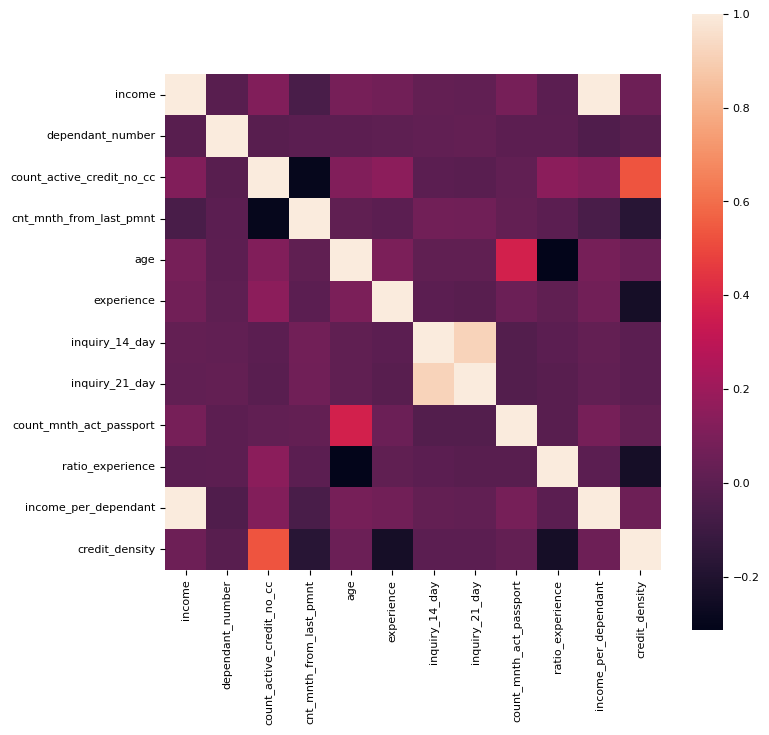

In [125]:
# матрица корреляций
plt.figure(figsize=(8, 8))
sns.heatmap(reject.select_dtypes(include=['float64']).corr(), square=True)
plt.show() #конечно числа точно не повторяют друг друга, но в целом тенденция такая же
#здесь сильнее count_active_credit_no_cc коррелирует с  credit_density
# возраст намного меньше коррелирует с опытом

In [126]:
#подготовливаю таблицу reject
features_to_use = scorecard_coarse.feature.unique().tolist()
columns_to_select = list(set(reject.columns).intersection(features_to_use))
reject_df = reject[columns_to_select]
# reject_df_copy= copy.deepcopy(reject_df)

cat = ['education_','customer_category_',  'is_empl','dependant_number']
interv = ['income', 'count_active_credit_no_cc', 'cnt_mnth_from_last_pmnt','experience', 
          'inquiry_21_day', 'count_mnth_act_passport','income_per_dependant','credit_density']
for column in cat:
    if reject_df[column].isnull().any():
        reject_df[column] = reject_df[column].fillna('UNK')

for column in interv:
    if reject_df[column].isnull().any():
        reject_df[column] = reject_df[column].fillna('[0,0]')


C:\Users\murad\AppData\Local\Temp\ipykernel_15272\2020475284.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reject_df[column] = reject_df[column].fillna('UNK')
C:\Users\murad\AppData\Local\Temp\ipykernel_15272\2020475284.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reject_df[column] = reject_df[column].fillna('[0,0]')


In [127]:
# разметка
result_df = pd.DataFrame()

for idx, row in reject_df.iterrows():
    new_row = {}

    for column in reject_df.columns:
        if column in cat:
            new_row[column] = scorecard_coarse[(scorecard_coarse.Value == row[column]) & (scorecard_coarse.feature == column)].WoE.values[0]
        elif column in interv:
            if row[column] == '[0,0]':
                new_row[column] = scorecard_coarse[(scorecard_coarse.feature == column) & (scorecard_coarse.Value == '[0,0]')].WoE.values[0]
            else:
                for k in range(len(scorecard_coarse)):
                    if (scorecard_coarse['feature'][k] == column) and (scorecard_coarse['Value'][k] != '[0,0]') and (row[column] > scorecard_coarse['Value'][k].left) and (row[column] <= scorecard_coarse['Value'][k].right):
                        new_row[column] = scorecard_coarse['WoE'][k]
                        break
                if column not in new_row:  # проверка на то, было ли найдено значение WoE
                    new_row[column] = scorecard_coarse[(scorecard_coarse.feature == column) & (scorecard_coarse.Value == '[0,0]')].WoE.values[0]

    result_df = pd.concat([result_df, pd.DataFrame([new_row])])

result_df.index = reject_df.index


На этом этапе случилась проблема. Я понимаю, что новые размеченные надо соединить с изначальным исходным train_accept. А тестовые данные у нас не должны меняться по ходу работы над моделью (после построения конечно лучше проверить на разных) - это нужно, чтобы проследить, как мы модель изменяем, как это влияет на результат, что в итоге лучше для нас как банка. Однако возникли проблемы после соединения result_df и первоначального testa. То есть там почему-то возникали none даже после подсчета woe и iv и всей обработки, которую я делаю ниже (и после повторной обработки неизвестных значений тоже). Эти none повторно никак не обрабатывались, а с ними логрегрессия, ранее обученная на данных без none, никак не работает. Поэтому я опять буду делить на трейн_тест_сплит, поэтому тестовые данные перемешаются, но как есть....(

In [128]:
result = copy.deepcopy(result_df)
result = result.add_prefix('WoE_')

In [144]:
optimal_threshold_train

array([1.99737775e+00, 9.97377748e-01, 9.96551532e-01, ...,
       1.99973899e-04, 1.80463492e-04, 1.44398819e-04])

In [149]:
#в исходный reject подставляем таргет
columns_order = X_train.columns.tolist()
result_final = result.reindex(columns=columns_order)
y_pred_reject = logreg.predict_proba(result_final)[:, 1]

reject_before['target'] =(y_pred_reject> optimal_threshold).astype(int) #нашли в прошлой части, порог при котором рок-аук на трейне максимален
#СОЕДИНЯЕМ С ИСХОДНЫМ ТРЕЙНОМ!

combined_df = pd.concat([reject_before, accept_df_for_reject], ignore_index=True)
combined_df

,income_type,education_,customer_category_,income,dependant_number,is_empl,count_active_credit_no_cc,cnt_mnth_from_last_pmnt,age,experience,inquiry_14_day,inquiry_21_day,count_mnth_act_passport,uid,ratio_experience,income_per_dependant,credit_density,credit_exists,target
0,2NDFL,elementary,NaN,26106.0,0.0,0,0.0,1.666801,24.353193,3.284153,1.0,1.0,4.268261,12,0.134855,26106.0,0.000000,0,1
1,2NDFL,elementary,NaN,30276.0,0.0,0,1.0,0.660461,23.534494,3.581069,0.0,0.0,1.411206,27,0.152163,30276.0,0.279246,1,1
2,2NDFL,advanced,NaN,23147.0,0.0,0,0.0,4.342025,24.580021,0.645774,0.0,1.0,4.544405,33,0.026272,23147.0,0.000000,0,0
3,2NDFL,advanced,NaN,33116.0,0.0,0,0.0,0.758714,23.284153,0.901130,0.0,0.0,3.183060,41,0.038701,33116.0,0.000000,0,1
4,2NDFL,elementary,NaN,45972.0,0.0,0,NaN,NaN,24.528535,1.405247,NaN,NaN,3.581967,55,0.057290,45972.0,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43242,OTHER,elementary,NaN,90000.0,0.0,0,0.0,10.693705,40.642922,4.847840,0.0,0.0,11.528767,138843,0.119279,90000.0,0.000000,0,1
43243,OTHER,advanced,NaN,60000.0,0.0,0,1.0,0.891062,28.163934,3.329927,1.0,1.0,7.242256,139153,0.118234,60000.0,0.300307,1,1
43244,OTHER,advanced,NaN,45000.0,0.0,0,0.0,0.301770,30.703810,1.418879,1.0,1.0,9.325728,139154,0.046212,45000.0,0.000000,0,1
43245,OTHER,advanced,Corporate,40000.0,0.0,0,NaN,NaN,29.716581,5.363156,NaN,NaN,6.935759,140165,0.180477,40000.0,NaN,0,1


In [150]:
interval_features = combined_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
interval_features.remove('target')
interval_features.remove('uid')
interval_features.remove('is_empl')
interval_features.remove('dependant_number')
categorical_features = combined_df.select_dtypes(include=['object']).columns.tolist()
categorical_features = categorical_features+['is_empl'] +['credit_exists'] +['dependant_number']

In [151]:
# делим интервальные переменные на бины
for feature in interval_features:
    combined_df[feature + '_bin'] = pd.qcut(combined_df[feature], 20, duplicates='drop')
    combined_df[feature + '_bin'] = combined_df[feature + '_bin'].cat.add_categories("0-0").fillna("0-0")

for feature in categorical_features:
    combined_df[feature] = combined_df[feature].fillna("UNK")

In [152]:
train, test = train_test_split(combined_df,
                               test_size=0.2,
                               random_state=42,
                               stratify=combined_df['target'])

In [153]:
train

,income_type,education_,customer_category_,income,dependant_number,is_empl,count_active_credit_no_cc,cnt_mnth_from_last_pmnt,age,experience,...,count_active_credit_no_cc_bin,cnt_mnth_from_last_pmnt_bin,age_bin,experience_bin,inquiry_14_day_bin,inquiry_21_day_bin,count_mnth_act_passport_bin,ratio_experience_bin,income_per_dependant_bin,credit_density_bin
26388,OTHER,elementary,UNK,40000.0,0.0,0,NaN,NaN,27.750685,0.271233,...,0-0,0-0,"(27.475, 28.682]","(0.0236, 0.373]",0-0,0-0,"(6.691, 7.428]","(-7.000000000000062e-06, 0.012]","(37366.0, 40020.0]",0-0
973,OTHER,elementary,Corporate,45470.0,0.0,1,NaN,NaN,23.226731,2.963717,...,0-0,0-0,"(0.0017299999999999998, 23.43]","(2.849, 3.375]",0-0,0-0,"(2.882, 3.281]","(0.121, 0.139]","(44500.0, 48993.7]",0-0
21845,2NDFL,elementary,UNK,11973.0,0.0,0,0.0,NaN,26.452055,0.333453,...,"(-0.001, 1.0]",0-0,"(26.29, 27.475]","(0.0236, 0.373]","(-0.001, 1.0]","(-0.001, 1.0]","(3.281, 3.663]","(0.012, 0.0162]","(-0.001, 14877.9]","(-0.001, 0.0845]"
35930,OTHER,advanced,UNK,18900.0,0.0,0,NaN,NaN,40.098630,3.402740,...,0-0,0-0,"(39.466, 41.633]","(3.375, 3.981]",0-0,0-0,"(10.781, 11.5]","(0.0781, 0.0908]","(17851.0, 20092.8]",0-0
37822,2NDFL,elementary,UNK,45900.0,0.0,0,0.0,NaN,37.361644,1.126027,...,"(-0.001, 1.0]",0-0,"(35.655, 37.447]","(0.951, 1.176]","(-0.001, 1.0]","(-0.001, 1.0]","(11.5, 43.099]","(0.0253, 0.0319]","(44500.0, 48993.7]","(-0.001, 0.0845]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8670,2NDFL,elementary,UNK,22696.0,0.0,0,0.0,NaN,24.353425,3.410959,...,"(-0.001, 1.0]",0-0,"(24.32, 24.683]","(3.375, 3.981]","(1.0, 6.0]","(2.0, 8.0]","(3.663, 4.022]","(0.139, 0.161]","(22541.0, 25000.0]","(-0.001, 0.0845]"
13369,OTHER,elementary,Corporate,76775.0,0.0,1,1.0,0.895273,29.663014,0.516992,...,"(-0.001, 1.0]","(0.83, 0.924]","(28.682, 29.849]","(0.497, 0.572]","(-0.001, 1.0]","(-0.001, 1.0]","(9.373, 9.81]","(0.0162, 0.0203]","(70000.0, 81211.0]","(1.133, 1.941]"
9138,OTHER,elementary,Corporate,19288.0,0.0,1,0.0,NaN,24.615667,0.675941,...,"(-0.001, 1.0]",0-0,"(24.32, 24.683]","(0.572, 0.744]","(-0.001, 1.0]","(-0.001, 1.0]","(4.366, 4.706]","(0.0253, 0.0319]","(17851.0, 20092.8]","(-0.001, 0.0845]"
33203,OTHER,elementary,UNK,57000.0,0.0,0,1.0,0.752375,27.904110,1.302074,...,"(-0.001, 1.0]","(0.691, 0.759]","(27.475, 28.682]","(1.176, 1.421]","(-0.001, 1.0]","(-0.001, 1.0]","(7.428, 8.205]","(0.0395, 0.0477]","(53000.0, 60000.0]","(0.736, 1.133]"


In [154]:
scorecard = pd.DataFrame()
for feature in interval_features:

    df, iv = calculate_woe_iv(train, feature + '_bin', 'target')
    df['feature'] = feature
    train = train.merge(df[['Value', 'WoE']], how='inner', left_on=feature + '_bin', right_on='Value' )
    train = train.rename(columns={'WoE':'WoE'+'_'+feature})

    train = train.drop(columns = [feature, feature + '_bin', 'Value'])

    test = test.merge(df[['Value', 'WoE']], how='inner', left_on=feature + '_bin', right_on='Value' )
    test = test.rename(columns={'WoE':'WoE'+'_'+feature})


    test = test.drop(columns = [feature, feature + '_bin', 'Value'])
    scorecard = pd.concat([scorecard, df[['feature', 'Value', 'WoE']]])
    print('feature', feature, '  IV= ',iv)



feature income   IV=  0.22772362527398807
feature count_active_credit_no_cc   IV=  0.24993784962379423
feature cnt_mnth_from_last_pmnt   IV=  0.4668060110384101
feature age   IV=  2.1767809141976597
feature experience   IV=  0.6865009282792728
feature inquiry_14_day   IV=  0.2618343500929257
feature inquiry_21_day   IV=  0.2888352533498062
feature count_mnth_act_passport   IV=  1.4627892697276856
feature ratio_experience   IV=  0.4318073665190332
feature income_per_dependant   IV=  0.22308882643057312
feature credit_density   IV=  0.4507690177559954


In [155]:
for feature in categorical_features:
    df, iv = calculate_woe_iv(train, feature , 'target')
    df['feature'] = feature
    train = train.merge(df[['Value', 'WoE']], how='inner', left_on=feature, right_on='Value' )
    train = train.rename(columns={'WoE':'WoE'+'_'+feature})
    train = train.drop(columns = [feature, 'Value'])

    test = test.merge(df[['Value', 'WoE']], how='inner', left_on=feature, right_on='Value' )
    test = test.rename(columns={'WoE':'WoE'+'_'+feature})
    test = test.drop(columns = [feature, 'Value'])
    scorecard = pd.concat([scorecard, df[['feature', 'Value', 'WoE']]])


    print('feature', feature, '  IV= ',iv)

feature income_type   IV=  0.3942312947509605
feature education_   IV=  0.03970792929276351
feature customer_category_   IV=  0.9029718789606425
feature is_empl   IV=  1.4598871294604487
feature credit_exists   IV=  0.041647507320973796
feature dependant_number   IV=  0.05001685392615442


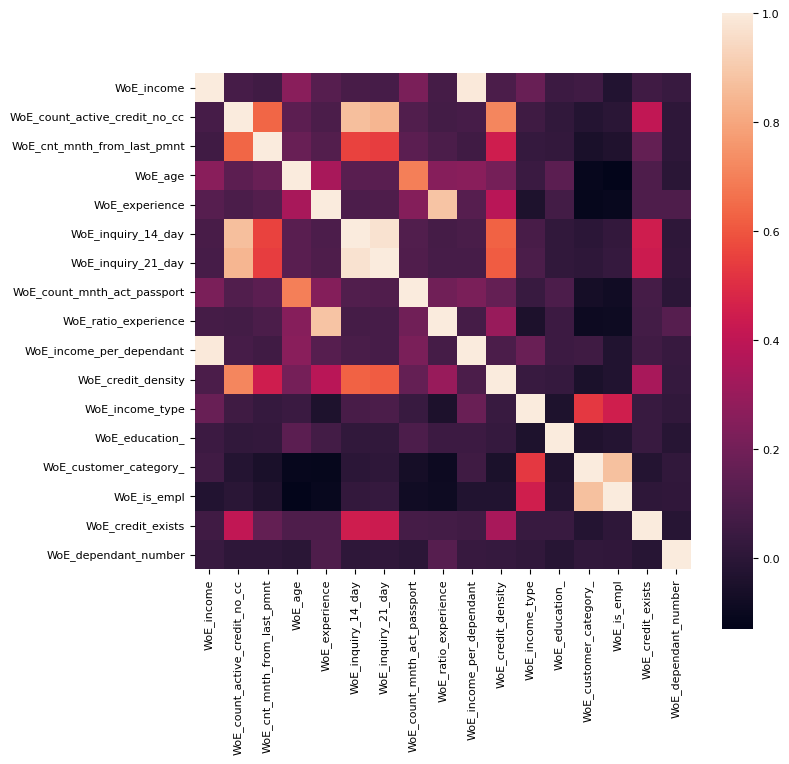

In [156]:
correlations_woe = train.select_dtypes(include=['float64']).corr()
plt.figure(figsize=(8, 8))
sns.heatmap(correlations_woe, square=True)
plt.show()

In [157]:
features = test.columns.tolist() #У всех переменных IV больше 0.02!
features.remove('uid')
features.remove('target')

In [158]:
X_train = train[features]
X_test = test[features]
y_train = train['target']
y_test = test['target']

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
features_coefs = pd.DataFrame(zip(X_train.columns, np.transpose(logreg.coef_.tolist()[0])),
                              columns=['features', 'coef'])

intercept = logreg.intercept_
print('intercept=', intercept)
X_test

intercept= [-1.98770832]


,WoE_income,WoE_count_active_credit_no_cc,WoE_cnt_mnth_from_last_pmnt,WoE_age,WoE_experience,WoE_inquiry_14_day,WoE_inquiry_21_day,WoE_count_mnth_act_passport,WoE_ratio_experience,WoE_income_per_dependant,WoE_credit_density,WoE_income_type,WoE_education_,WoE_customer_category_,WoE_is_empl,WoE_credit_exists,WoE_dependant_number
0,-0.372704,0.431916,0.698567,1.752854,-0.341335,0.466931,0.496988,1.794109,-0.406507,-0.362025,0.543838,0.584692,0.102397,1.744593,2.683819,-0.134516,0.007547
1,-0.372704,0.431916,0.211030,-1.513072,-0.496032,0.466931,0.496988,-0.480158,-0.406507,-0.362025,0.543838,0.584692,0.102397,1.744593,2.683819,-0.134516,0.007547
2,-0.372704,0.431916,1.346198,1.713581,0.030715,0.466931,0.496988,1.773673,-0.297966,-0.362025,0.543838,0.584692,0.102397,1.744593,2.683819,-0.134516,0.007547
3,-0.372704,0.431916,1.679544,1.713581,0.030715,0.466931,0.496988,1.829011,-0.297966,-0.362025,0.543838,0.584692,0.102397,1.744593,2.683819,-0.134516,0.007547
4,-0.372704,0.431916,1.357951,-1.645490,0.132241,-0.577402,-0.577402,-1.064561,0.306262,-0.362025,0.543838,0.584692,0.102397,1.744593,2.683819,-0.134516,0.007547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,-0.639024,0.141297,-0.162570,1.879315,-3.988286,0.466931,0.496988,1.814595,-3.988286,-0.637740,-0.644574,0.584692,0.102397,-0.559495,-0.612121,0.310687,-5.608195
8644,-0.639024,0.431916,-0.162570,1.685595,-3.988286,0.466931,0.496988,1.705322,-3.988286,-0.637740,-0.644574,0.584692,0.102397,-0.559495,-0.612121,0.310687,-5.608195
8645,-0.639024,0.148114,0.940647,1.555899,-3.988286,0.466931,0.496988,1.797651,-3.988286,-0.637740,-0.644574,-0.696994,0.102397,-0.559495,-0.612121,0.310687,-5.608195
8646,-0.639024,0.141297,0.581624,1.605279,-3.988286,0.466931,0.496988,1.829011,-3.988286,-0.637740,-0.644574,-0.696994,0.005627,-0.559495,-0.612121,0.310687,-5.608195


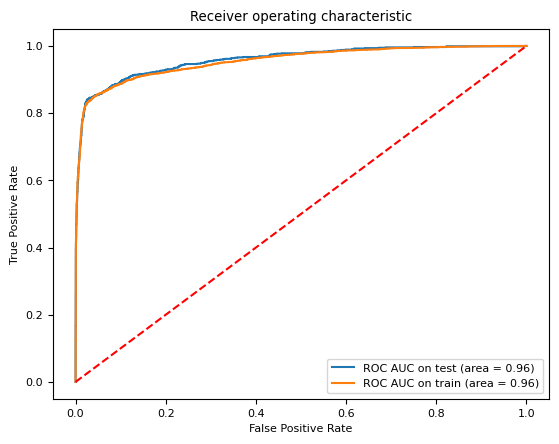

In [159]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix

y_pred = logreg.predict(X_test)

plt.rc("font", size=8)


logit_roc_auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = metrics.roc_curve(y_test, logreg.predict_proba(X_test)[:,1])



logit_roc_auc_train = roc_auc_score(y_train, logreg.predict_proba(X_train)[:,1])
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, logreg.predict_proba(X_train)[:,1])


plt.figure()
plt.plot(fpr, tpr, label='ROC AUC on test (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr_train, tpr_train, label='ROC AUC on train (area = %0.2f)' % logit_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() #СТАЛО НАМНОГО ЛУЧШЕ!

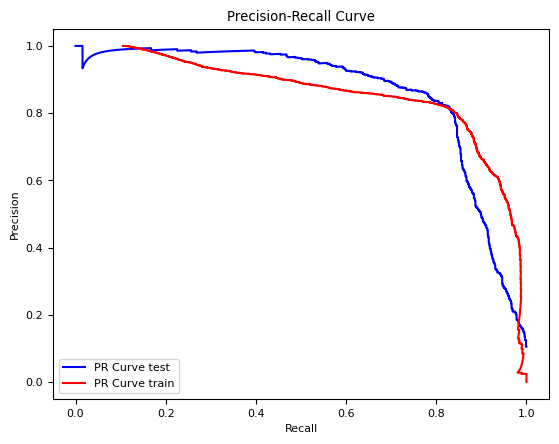

Best F1-Score on Test Data: 0.8240437158469945
F1-Score on Training Data: 0.8205199115044248


In [160]:
from sklearn.metrics import precision_recall_curve, f1_score

precision, recall, thresholds_pr = precision_recall_curve(y_test, logreg.predict_proba(X_test)[:,1])
f1 = 2 * (precision * recall) / (precision + recall)
precision_train, recall_train, thresholds_pr_train = precision_recall_curve(y_train, logreg.predict_proba(X_train)[:,1])

plt.figure()
plt.plot(recall, precision, color='b', label='PR Curve test')
plt.plot(precision_train, recall_train, color='r', label='PR Curve train')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

best_threshold = thresholds_pr[np.argmax(f1)]
f1_score_test = max(f1)
print("Best F1-Score on Test Data:", f1_score_test)

y_preds_train = (logreg.predict_proba(X_train)[:,1] > best_threshold).astype(int)
f1_score_train = f1_score(y_train, y_preds_train)
print("F1-Score on Training Data:", f1_score_train) #И pr-кривая выглядит достойнее

In [162]:
scorecard['features'] = 'WoE_'+scorecard['feature'].astype(str)
scorecard = scorecard.merge(features_coefs,how='inner', on='features')
scorecard = scorecard.drop(columns = 'features')
scorecard

,feature,Value,WoE,coef
0,income,0-0,-0.639024,-0.806005
1,income,"(25000.0, 27000.0]",-0.458029,-0.806005
2,income,"(-0.001, 14974.7]",-0.408796,-0.806005
3,income,"(29708.0, 31653.2]",-0.398885,-0.806005
4,income,"(22630.4, 25000.0]",-0.372704,-0.806005
...,...,...,...,...
182,dependant_number,UNK,-5.608195,-1.747848
183,dependant_number,4.0,-0.437061,-1.747848
184,dependant_number,0.0,0.007547,-1.747848
185,dependant_number,1.0,0.245284,-1.747848


In [163]:
pdo = 20
Target_Odds = 50
Target_Score = 600

Factor = pdo/np.log(2)
Offset = Target_Score-(Factor*np.log(Target_Odds))
print(Factor, Offset)


28.85390081777927 487.1228762045055


In [164]:
scorecard['score'] = (-1)*(scorecard['coef']*scorecard['WoE'] + intercept/13)*Factor + Offset/13
scorecard['score'] = scorecard['score'].round(0)
scorecard['WoE'] = scorecard['WoE'].round(2)
scorecard['coef'] = scorecard['coef'].round(2)
scorecard

,feature,Value,WoE,coef,score
0,income,0-0,-0.64,-0.81,27.0
1,income,"(25000.0, 27000.0]",-0.46,-0.81,31.0
2,income,"(-0.001, 14974.7]",-0.41,-0.81,32.0
3,income,"(29708.0, 31653.2]",-0.40,-0.81,33.0
4,income,"(22630.4, 25000.0]",-0.37,-0.81,33.0
...,...,...,...,...,...
182,dependant_number,UNK,-5.61,-1.75,-241.0
183,dependant_number,4.0,-0.44,-1.75,20.0
184,dependant_number,0.0,0.01,-1.75,42.0
185,dependant_number,1.0,0.25,-1.75,54.0


In [168]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred, target_names=['1', '0'])
print(report) 

              precision    recall  f1-score   support

           1       0.98      0.98      0.98      7739
           0       0.83      0.81      0.82       909

    accuracy                           0.96      8648
   macro avg       0.90      0.89      0.90      8648
weighted avg       0.96      0.96      0.96      8648



In [165]:
fpr, tpr, thresholds = roc_curve(y_train, logreg.predict_proba(X_train)[:,1])
gmeans = np.sqrt(tpr + (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

Best Threshold=0.132881, G-Mean=1.345


   - Для класса 1 точность составляет 98%. Это означает, что из всех клиентов, которым модель предсказала дефолт, 98% действительно имели дефолт.
   - Для класса 0  точность составляет 83%. Это означает, что из всех клиентов, которым модель предсказала отсутствие дефолта, 83% действительно не имели дефолта.

   - Для класса 1 полнота также составляет 98%. Это означает, что модель правильно определила 98% всех клиентов, у которых был дефолт.
   - Для класса 0 полнота равна 81%. Это означает, что модель правильно определила 81% всех клиентов, у которых не было дефолта.

   - F1-мера для класса 1 составляет 0.98, а для класса 0 - 0.82.

   - Общая точность модели составляет 96%. Это означает, что 96% всех примеров были классифицированы правильно.

Исходя из этих результатов, можно сделать вывод, что модель все еще хорошо справляется с задачей кредитного скоринга. Она имеет высокие показатели точности, полноты и F1-меры для обоих классов. F-1 мера как среднее гармоническое между точностью и полнотой дают одинаковый вес им обоим (то есть она будет одинаково падать при уменьшение precision или recall). Поэтому мы как банк можем балансировать между желаемыми результатами этой метрики. Также общая точность на уровне 96%, что свидетельствует о хорошем качестве модели. Резльтат после построения reject inference УЛУЧШИЛСЯ, roc-auc стал очень хорошими, reject inference очень пригодился, так как результаты анализа отказов были использованы для оптимизации стратегии принятия решений моделью, для улучшения баланса между точностью и полнотой.

Мониторинг модели!

   - Стоит определить, а что для нас является ключевыми метриками: f1, recall, precision и так далее. На что мы ориентируемся больше всего. 

   - Надо постоянно проверять, что данные, поступающие в модель, соответствуют ожидаемому формату и качеству. Мониторинг качества данных поможет избежать ошибок из-за некорректных данных.
   - Нужно регулярно оценивать производительность модели на новых данных из продакшена. Это поможет выявить изменения в ее работе и возможные проблемы.

   - Нужно проверять, что распределение признаков на входе в модель не меняется со временем. Изменения в распределении могут привести к ухудшению производительности модели. Через время нам могут потребоваться совершенно другие признаки

   - Нужно оценивать результаты reject inference на регулярной основе. Стоит постоянно убеждаться, что модель правильно классифицирует отказы и что доля отказов находится на ожидаемом уровне.

   - Также нужно проверять, что интерпретация модели остается стабильной. Изменения в WOE значащих переменных могут указывать на необходимость переобучения или корректировки модели.

   - Нужно проводить регулярное обновление модели на основе новых данных и результатов мониторинга. Это поможет поддерживать высокое качество работы модели.
   - Нужно разработать план управления рисками для случаев, когда производительность модели снижается или возникают проблемы. Это поможет минимизировать потенциальные негативные последствия.

Опционально, для тех , кто добрался до конца ноутбука 😊

ваше впечатление от работы. Что было сложно? Что было интересно?

дз очень неприятное просто потому, что непонятно НИЧЕГО, что надо делать. несмотря на то, что я начала делать дз сразу после выдачи, остановилась на coarse classing, тк было непонятно, как именно обрабатывать бины, чтобы получить монотонность (и что делать если ее таки нет). и в итоге все делалось в последний момент благодаря вашим ответам в чате и личке моим коллегам :) собственно, поэтому сдаю после дедлайна (был выбор сдавать код без выводов вообще, либо все-таки просрочить). Пожалуйста, расписывайте более подробно, как это делается. Я с этим сталкиваюсь впервые, в интернете толком никакой информации нет (кроме общих рассказов о том, для чего это нужно), на занятиях мы не успеваем более подробно разобрать всё из-за ограничений по времени и большого количества тем, а для меня идеи, реализованные выше, вообще не тривиальные и интуитивно понятные, поэтому создалось ощущение, что я просто тыкалась, чтобы получить что-то более менее вразумительное. Хотя и ваши занятия, и в принципе сама тема мне очень зашли, но ощущение после наконец выполненного измученного дз не очень (и не у меня одной...)